In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("../")
from src import soporte_preprocesamiento as sp
from src import soporte_nulos as sn
from src import soporte_encoding as se
from src import soporte_outliers as so
from src import soporte_ajuste as sa
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler
import seaborn as sns

In [2]:
df = pd.read_csv("../datos/madrid_interesante.csv", index_col=0)

In [3]:
sp.exploracion_datos(df)

El número de filas es 358 y el número de columnas es 29

----------

En este conjunto de datos tenemos 5 valores duplicados

----------

Los columnas con valores nulos y sus porcentajes son: 


hasVideo             3.91
status               3.91
newDevelopment       3.91
priceByArea          3.91
detailedType         3.91
suggestedTexts       3.91
hasPlan              3.91
has360               3.91
hasStaging           3.91
externalReference   22.91
floor               18.44
district            14.53
hasLift              5.03
dtype: float64


----------

Las principales estadísticas de las variables númericas son:


count          mean           std        min           25%  \
propertyCode 358.00 94,946,344.59 13,283,485.74 666,696.00 97,722,784.25   
price        358.00        692.86         61.14     400.00        652.00   
size         358.00         60.05         23.87      20.00         45.00   
rooms        358.00          1.55          0.93       0.00          1.00   
bathrooms    358.00          1.12          0.33       1.00          1.00   
distance     358.00     16,788.29     13,483.19     183.00      5,656.75   
priceByArea  344.00         13.22          5.11       3.00         10.00   

                       50%           75%           max  
propertyCode 98,669,278.00 98,896,452.50 98,939,685.00  
price               700.00        740.00        750.00  
size                 57.00         71.75        206.00  
rooms                 2.00          2.00          4.00  
bathrooms             1.00          1.00          3.00  
distance         12,383.00     26,518.75     56,596.00  
priceByArea          12.00         16.00         33.00


----------

Las principales estadísticas de las variables categóricas son:


count unique  \
propertyType        358      6   
operation           358      1   
address             358    324   
province            358      1   
municipality        358     62   
country             358      1   
latitude            358    344   
longitude           358    344   
hasVideo            344      4   
status              344      3   
newDevelopment      344      3   
detailedType        344      8   
suggestedTexts      344    315   
hasPlan             344      4   
has360              344      4   
hasStaging          344      2   
externalReference   276    268   
floor               292     13   
district            306     83   
hasLift             340      4   

                                                                 top freq  
propertyType                                                    flat  282  
operation                                                       rent  358  
address                                     Calle Valle de Ambles, 2   10  
province                                                      Madrid  358  
municipality                                                  Madrid  170  
country                                                           es  358  
latitude                                                 404.430.651   10  
longitude                                                -34.659.877   10  
hasVideo                                                       False  232  
status                                                          good  325  
newDevelopment                                                 False  323  
detailedType                                    {'typology': 'flat'}  273  
suggestedTexts     {'subtitle': 'Suroeste, Torrejón de Ardoz', 't...   10  
hasPlan                                                        False  219  
has360                                                         False  255  
hasStaging                                                     False  340  
externalReference                                        3,80811E+11    2  
floor                                                              1   70  
district                                                      Centro   47  
hasLift                                                         True  178


----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 358 entries, 0 to 357
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   propertyCode       358 non-null    int64  
 1   price              358 non-null    float64
 2   propertyType       358 non-null    object 
 3   operation          358 non-null    object 
 4   size               358 non-null    float64
 5   exterior           358 non-null    bool   
 6   rooms              358 non-null    int64  
 7   bathrooms          358 non-null    int64  
 8   address            358 non-null    object 
 9   province           358 non-null    object 
 10  municipality       358 non-null    object 
 11  country            358 non-null    object 
 12  latitude           358 non-null    object 
 13  longitude          358 non-null    object 
 14  showAddress        358 non-null    bool   
 15  distance       

None

### Podemos observar que las siguientes columnas, no deben incluirse en el analisis, bien por que son columnas específicas del anuncio o por que es una columna la cual no aporta valor al análisis.  
Las columnas son:
- `properyCode`  

- `latitude`  

- `longitude`
- `hasplan`
- `has360`
- `externalReference`


### 

In [4]:
columnas_no_deseadas = ["latitude", "longitude", "hasPlan", "propertyCode", "has360", "externalReference", "hasVideo", "suggestedTexts"]

df_filtrado_madrid = df.drop(columns=columnas_no_deseadas)

### Eliminamos los duplicados

In [5]:
df_filtrado_madrid.drop_duplicates(inplace=True)

In [6]:
df_filtrado_madrid.duplicated().sum()

0

### Identificamos y Gestionamos Nulos

In [7]:
GestorNulos = sn.GestionNulos(df_filtrado_madrid)

#### CATEGÓRICAS

In [8]:
GestorNulos.mostrar_distribucion_categoricas()

La distribución de las categorías para la columna STATUS


status
good             0.96
newdevelopment   0.04
renew            0.01
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna NEWDEVELOPMENT


newDevelopment
False   0.95
True    0.04
0.0     0.01
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna DETAILEDTYPE


detailedType
{'typology': 'flat'}                                          0.79
{'typology': 'flat', 'subTypology': 'studio'}                 0.14
{'typology': 'flat', 'subTypology': 'duplex'}                 0.03
{'typology': 'flat', 'subTypology': 'penthouse'}              0.03
{'typology': 'chalet', 'subTypology': 'independantHouse'}     0.00
{'typology': 'chalet'}                                        0.00
{'typology': 'chalet', 'subTypology': 'terracedHouse'}        0.00
{'typology': 'countryHouse', 'subTypology': 'countryHouse'}   0.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna HASSTAGING


hasStaging
False   0.99
0.0     0.01
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna FLOOR


floor
1    0.24
bj   0.20
2    0.19
3    0.16
4    0.11
5    0.03
en   0.02
8    0.01
6    0.01
st   0.00
7    0.00
14   0.00
ss   0.00
Name: proportion, dtype: float64

........................
La distribución de las categorías para la columna DISTRICT


district
Centro                            0.16
Villaverde                        0.08
Puente de Vallecas                0.05
Tetuán                            0.04
San Blas                          0.04
                                  ... 
Sudeste Industrial                0.00
Juan de Austria                   0.00
Montserrat - Parque Empresarial   0.00
La Montaña-El Cortijo             0.00
Alcobendas Centro                 0.00
Name: proportion, Length: 83, dtype: float64

........................
La distribución de las categorías para la columna HASLIFT


hasLift
True    0.51
False   0.47
0.0     0.01
1.0     0.00
Name: proportion, dtype: float64

........................


### Tras el analisis hemos decidido sustituir los nulos en cada columna por el siguiente método:
- `status` -> moda  

- `newDevelopment` -> moda
- ``DetailedDtype`` -> mayor observación
- `hasStaging` -> sustituir 0.0 por Na y despues por la moda
- `floor` -> sustituir "en" y "ss" por "Unknown"
- `district` -> mayor observación
- `hasLift` -> sustituit 0.0 por False y 1.0 por True -> sustituir por "Unknown"

In [9]:
lista_moda = ["status", "newDevelopment", "hasStaging"]
lista_nueva_cat = ["floor", "hasLift"]

In [10]:
df_filtrado_madrid['hasStaging'] = df_filtrado_madrid['hasStaging'].replace(0.0, np.nan)
df_filtrado_madrid['floor'] = df_filtrado_madrid['floor'].replace({'en': np.nan, 'ss': np.nan})
df_filtrado_madrid['hasLift'] = df_filtrado_madrid['hasLift'].replace({0.0: False, 1.0: True})

In [11]:
GestorNulos.imputar_nulos_categoricas(lista_moda, lista_nueva_cat)

price propertyType operation  size  exterior  rooms  bathrooms  \
0   750.00         flat      rent 60.00      True      1          1   
1   750.00         flat      rent 70.00      True      2          1   
2   400.00    penthouse      rent 67.00      True      2          2   
3   590.00         flat      rent 70.00      True      3          2   
4   684.00       studio      rent 45.00      True      0          1   
..     ...          ...       ...   ...       ...    ...        ...   
353 640.00         flat      rent 69.00      True      2          1   
354 700.00         flat      rent 54.00      True      1          1   
355 700.00         flat      rent 59.00      True      1          1   
356 700.00         flat      rent 75.00      True      2          1   
357 695.00         flat      rent 62.00     False      2          1   

                             address province                municipality  \
0    Calle de Alejandro Villegas, 23   Madrid                      Madrid   
1                 Gregorio izquierdo   Madrid  San Sebastián de los Reyes   
2                       Calle Madrid   Madrid       Villamanrique de Tajo   
3                          Rascafría   Madrid                   Rascafría   
4       Av. José Antonio Corrales, 2   Madrid                      Madrid   
..                               ...      ...                         ...   
353      Calle Gonzalo de Berceo, 16   Madrid                 Villalbilla   
354            Calle Núñez de Balboa   Madrid                      Getafe   
355         Calle de las Trompas, 40   Madrid                      Madrid   
356          Calle Alonso Sánchez, 6   Madrid           Alcalá de Henares   
357      Calle de Isabel Rosillo, 11   Madrid                  Alcobendas   

    country  showAddress  distance status newDevelopment  priceByArea  \
0        es         True      7037   good            0.0        13.00   
1        es        False     16145   good            0.0        11.00   
2        es        False     55041   good            0.0         6.00   
3        es        False     56596   good            0.0         8.00   
4        es         True     10656   good          False          NaN   
..      ...          ...       ...    ...            ...          ...   
353      es         True     29311   good          False         9.00   
354      es        False     11656   good          False        13.00   
355      es         True      7529   good          False        12.00   
356      es         True     30359   good          False         9.00   
357      es         True     15162   good          False        11.00   

                                         detailedType hasStaging    floor  \
0                                {'typology': 'flat'}        0.0        3   
1                                {'typology': 'flat'}        0.0       bj   
2    {'typology': 'flat', 'subTypology': 'penthouse'}        0.0        2   
3                                {'typology': 'flat'}        0.0  Unknown   
4                                                 NaN      False  Unknown   
..                                                ...        ...      ...   
353                              {'typology': 'flat'}      False        2   
354                              {'typology': 'flat'}      False        1   
355                              {'typology': 'flat'}      False        6   
356                              {'typology': 'flat'}      False        1   
357                              {'typology': 'flat'}      False        3   

                       district  hasLift  
0                     Hortaleza      1.0  
1                 Centro Urbano      0.0  
2                           NaN      0.0  
3                           NaN      0.0  
4                           NaN  Unknown  
..                          ...      ...  
353                         NaN     True  
354               Getafe Centro     True  
355                 Carabanchel     Tr

In [12]:
GestorNulos.calcular_porcentaje_nulos()

priceByArea     3.98
detailedType    3.98
district       14.77
dtype: float64

> Ponemos estecial ojo en:
- ``detailedType``  

- ``district``  
  
    
  
**`detailedType`**

In [13]:
df_filtrado_madrid["detailedType"].value_counts()

detailedType
{'typology': 'flat'}                                           267
{'typology': 'flat', 'subTypology': 'studio'}                   46
{'typology': 'flat', 'subTypology': 'duplex'}                   11
{'typology': 'flat', 'subTypology': 'penthouse'}                10
{'typology': 'chalet', 'subTypology': 'independantHouse'}        1
{'typology': 'chalet'}                                           1
{'typology': 'chalet', 'subTypology': 'terracedHouse'}           1
{'typology': 'countryHouse', 'subTypology': 'countryHouse'}      1
Name: count, dtype: int64

Como tenemos 40 registros con subcategoria, creo que no es una muestra de datos como para poder entrenar ningun modelo para hacer mas precisa la prediccón, es por ello que el contenido de la key typology es redundante ya que aparece también en la columna propertyType

In [14]:
df_filtrado_madrid.drop("detailedType", axis=1, inplace=True)

**`district`**

In [15]:
df_filtrado_madrid["district"].value_counts()

district
Centro                             47
Villaverde                         23
Puente de Vallecas                 16
Tetuán                             13
San Blas                           12
                                   ..
Sudeste Industrial                  1
Juan de Austria                     1
Montserrat - Parque Empresarial     1
La Montaña-El Cortijo               1
Alcobendas Centro                   1
Name: count, Length: 83, dtype: int64

In [16]:
print(f"La cantidad de registros nulos es: {df_filtrado_madrid["district"].isna().sum()}")
print(f"La canidad de registros no nulos es: {df_filtrado_madrid["district"].notna().sum()}")

porcentaje_de_nulos = (df_filtrado_madrid["district"].isnull().sum() / df_filtrado_madrid["district"].shape[0]) * 100

print(f"El porcentaje de nulos en esta columna es de: {porcentaje_de_nulos}")


La cantidad de registros nulos es: 52
La canidad de registros no nulos es: 300
El porcentaje de nulos en esta columna es de: 14.772727272727273


<div style="background-color: #FFBB33; padding: 10px; border-left: 6px solid #000080; color: black; border-radius: 10px;">
Considero que es una columna demasiado importante como para sustiruitlo por nada, por ello decido extraer esos registros de mi analisis, como next steps, se puede valorar la posibilidad de entrenar otro modelo para predeicir estas columnas y mejorar nuestro podelo principal
</div>

In [17]:
df_filtrado_madrid = df_filtrado_madrid[df_filtrado_madrid['district'].notna()]

### Ahora vamos a pasar con las Numéricas

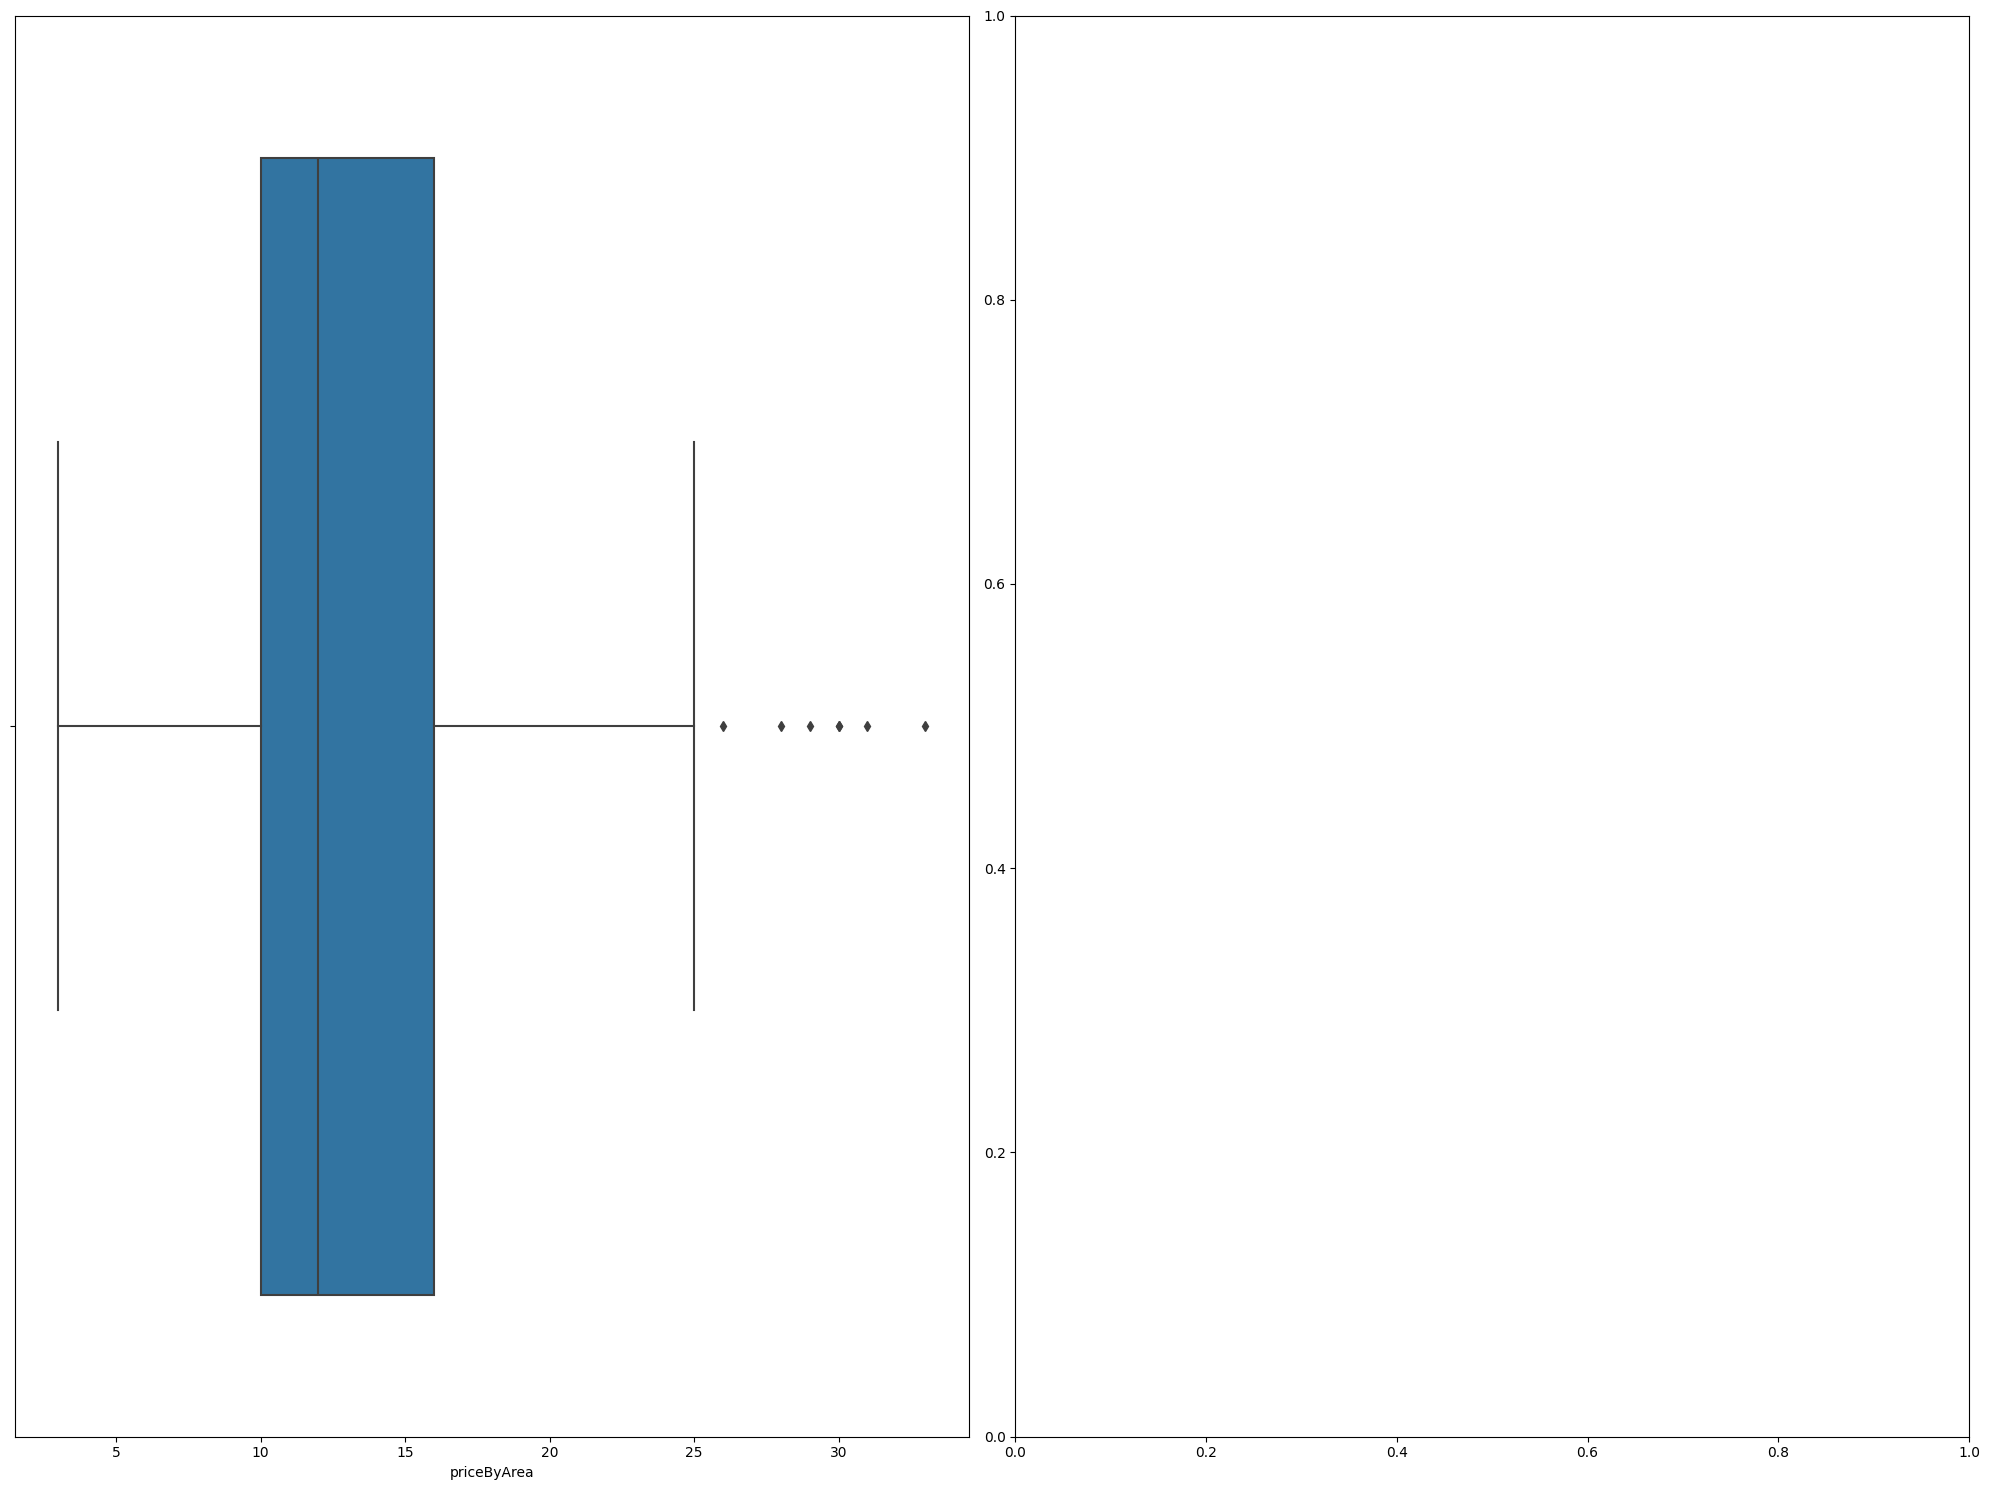

In [18]:
GestorNulos.identificar_nulos_numericas()

In [19]:
porcentaje_de_nulos1 = (df_filtrado_madrid["priceByArea"].isnull().sum() / df_filtrado_madrid["priceByArea"].shape[0]) * 100
porcentaje_de_nulos1

0.0

In [20]:
columnas_a_tratar = ["priceByArea"]
df_filtrado_madrid = GestorNulos.imputar_knn(columnas_a_tratar, numero_de_vecinos= 352 )
df_filtrado_madrid = GestorNulos.imputar_imputer(columnas_a_tratar)

In [21]:
GestorNulos.comparar_metodos()

priceByArea  priceByArea_iterative  priceByArea_knn
count       338.00                 352.00           352.00
mean         13.30                  13.30            13.30
std           5.12                   5.02             5.02
min           3.00                   3.00             3.00
25%          10.00                  10.00            10.00
50%          12.00                  12.00            12.00
75%          16.00                  16.00            16.00
max          33.00                  33.00            33.00

In [22]:
columnas_a_eliminar = ["priceByArea", "priceByArea_iterative"]
GestorNulos.columnas_eliminar(columnas_a_eliminar)

## Encoding

In [23]:
lista_col_categ = df_filtrado_madrid.select_dtypes(include="O").columns.tolist()
lista_col_categ

['propertyType',
 'operation',
 'address',
 'province',
 'municipality',
 'country',
 'status',
 'newDevelopment',
 'hasStaging',
 'floor',
 'district',
 'hasLift']

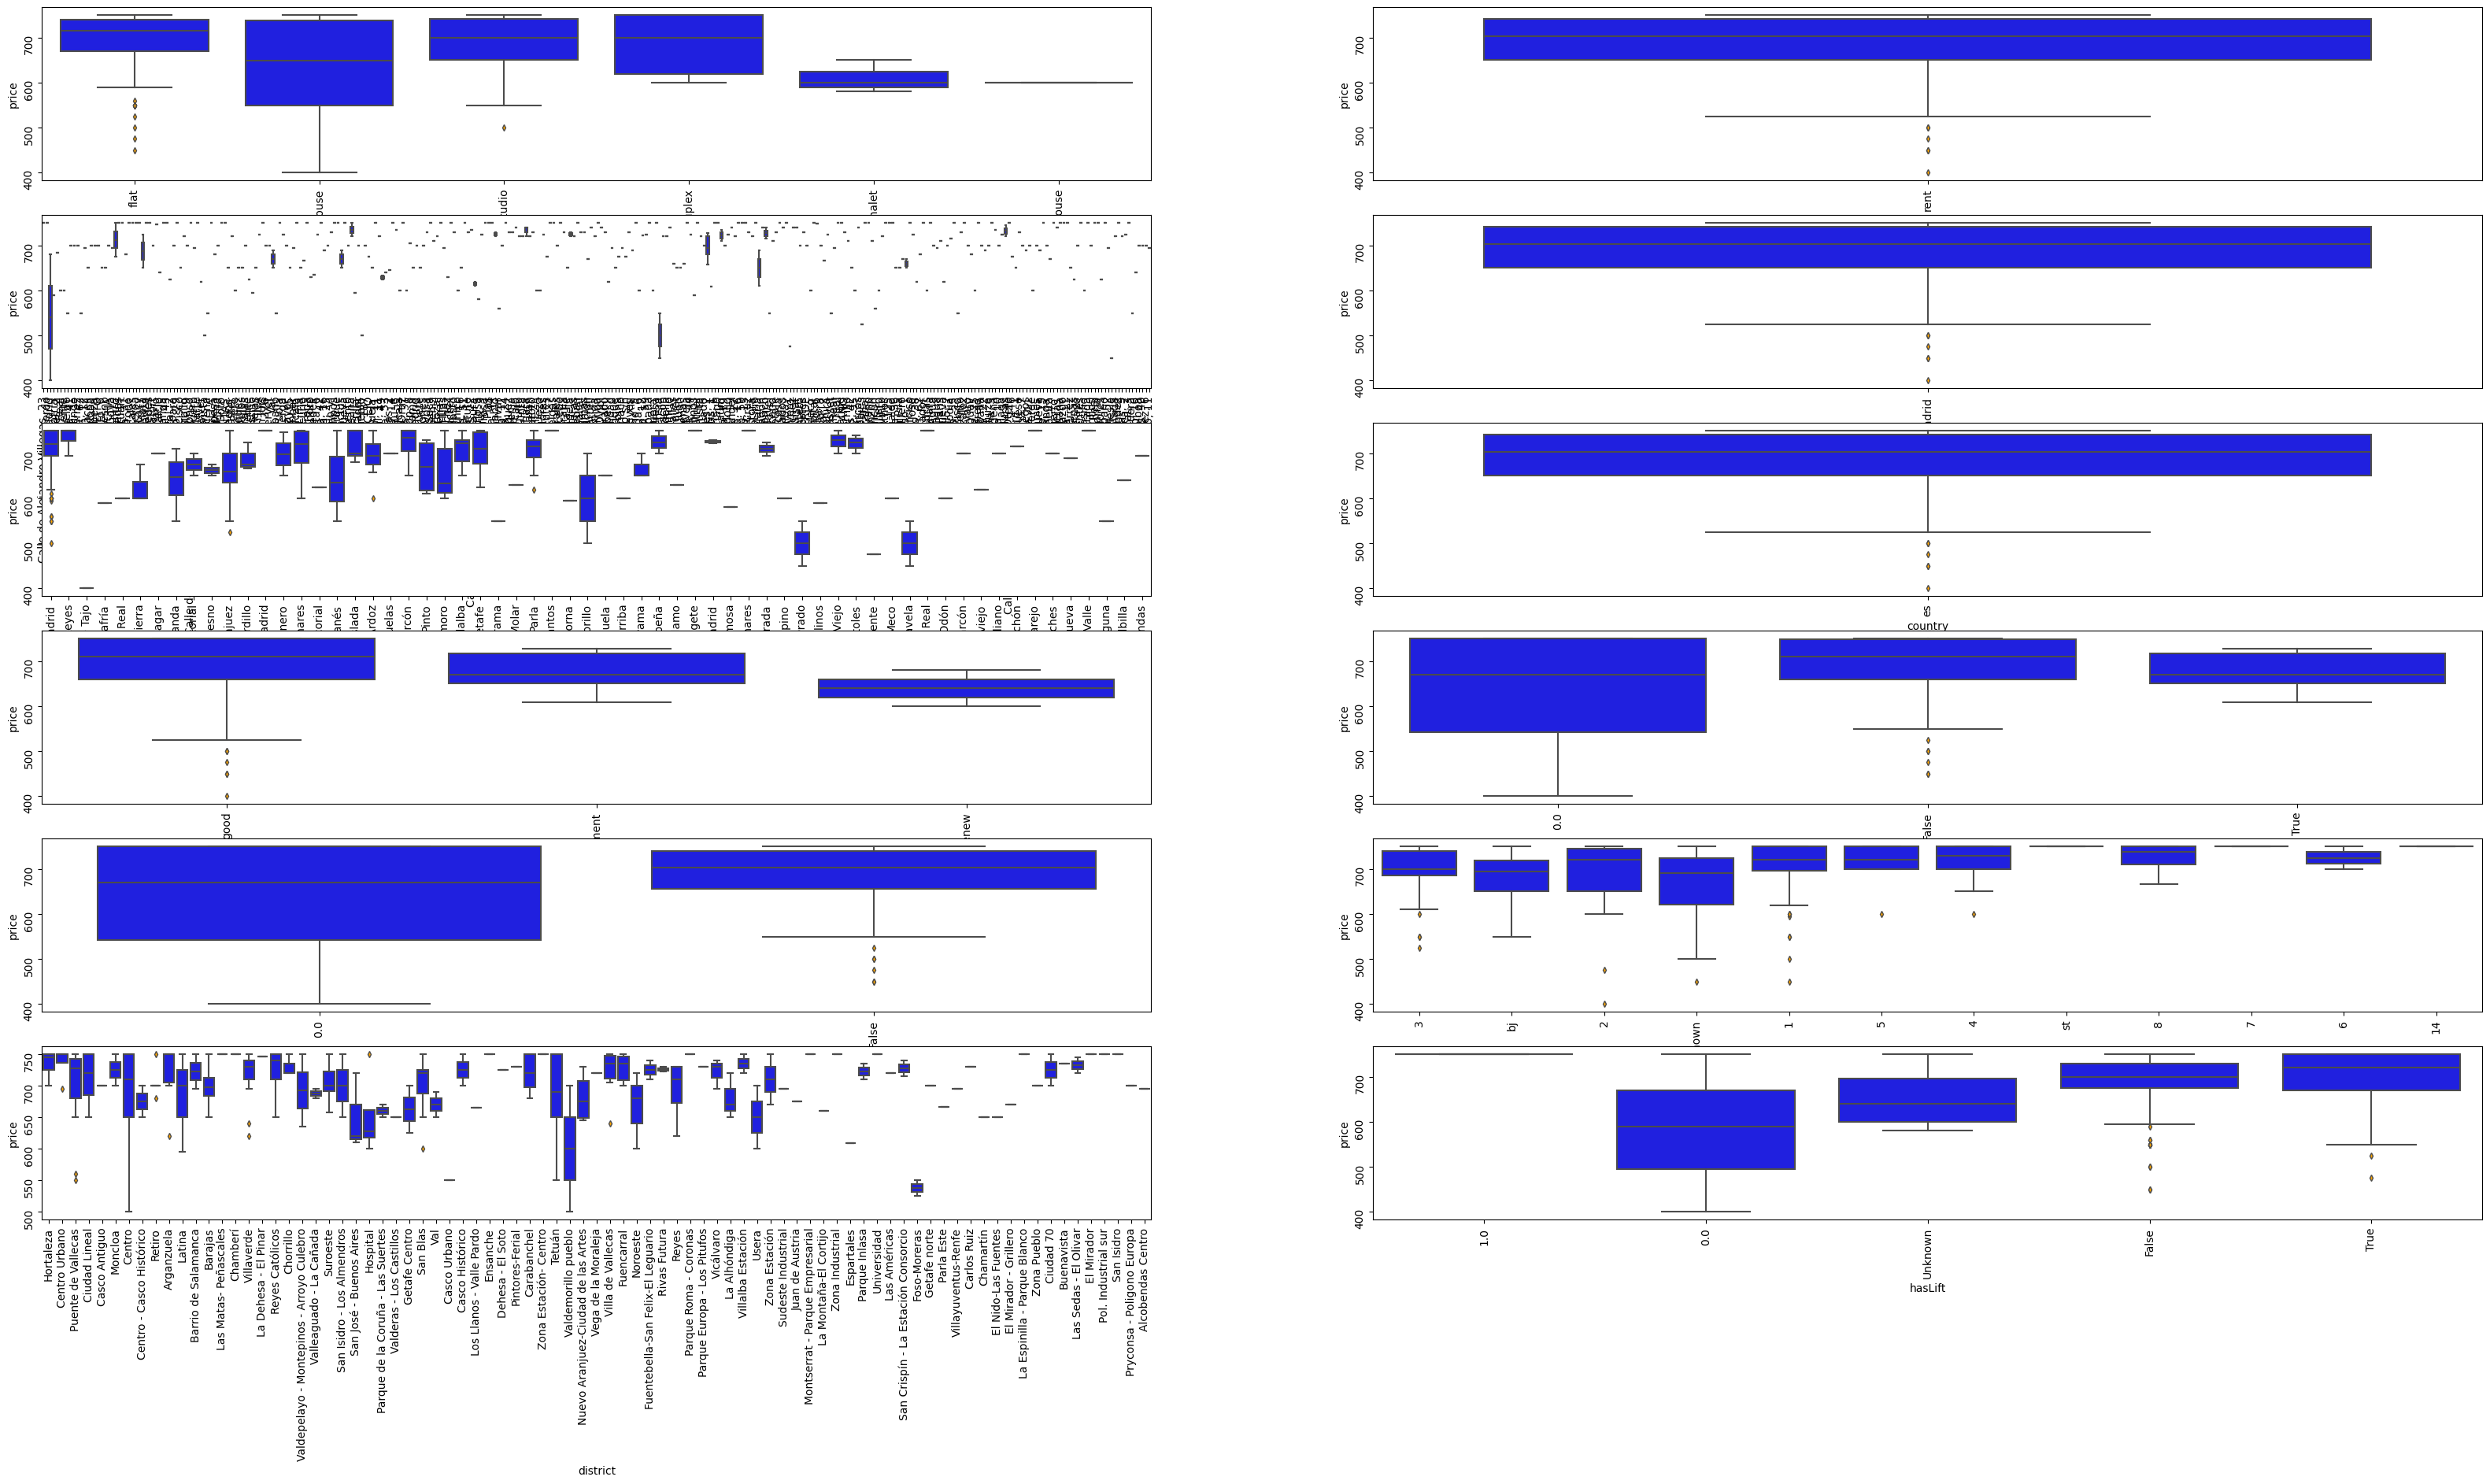

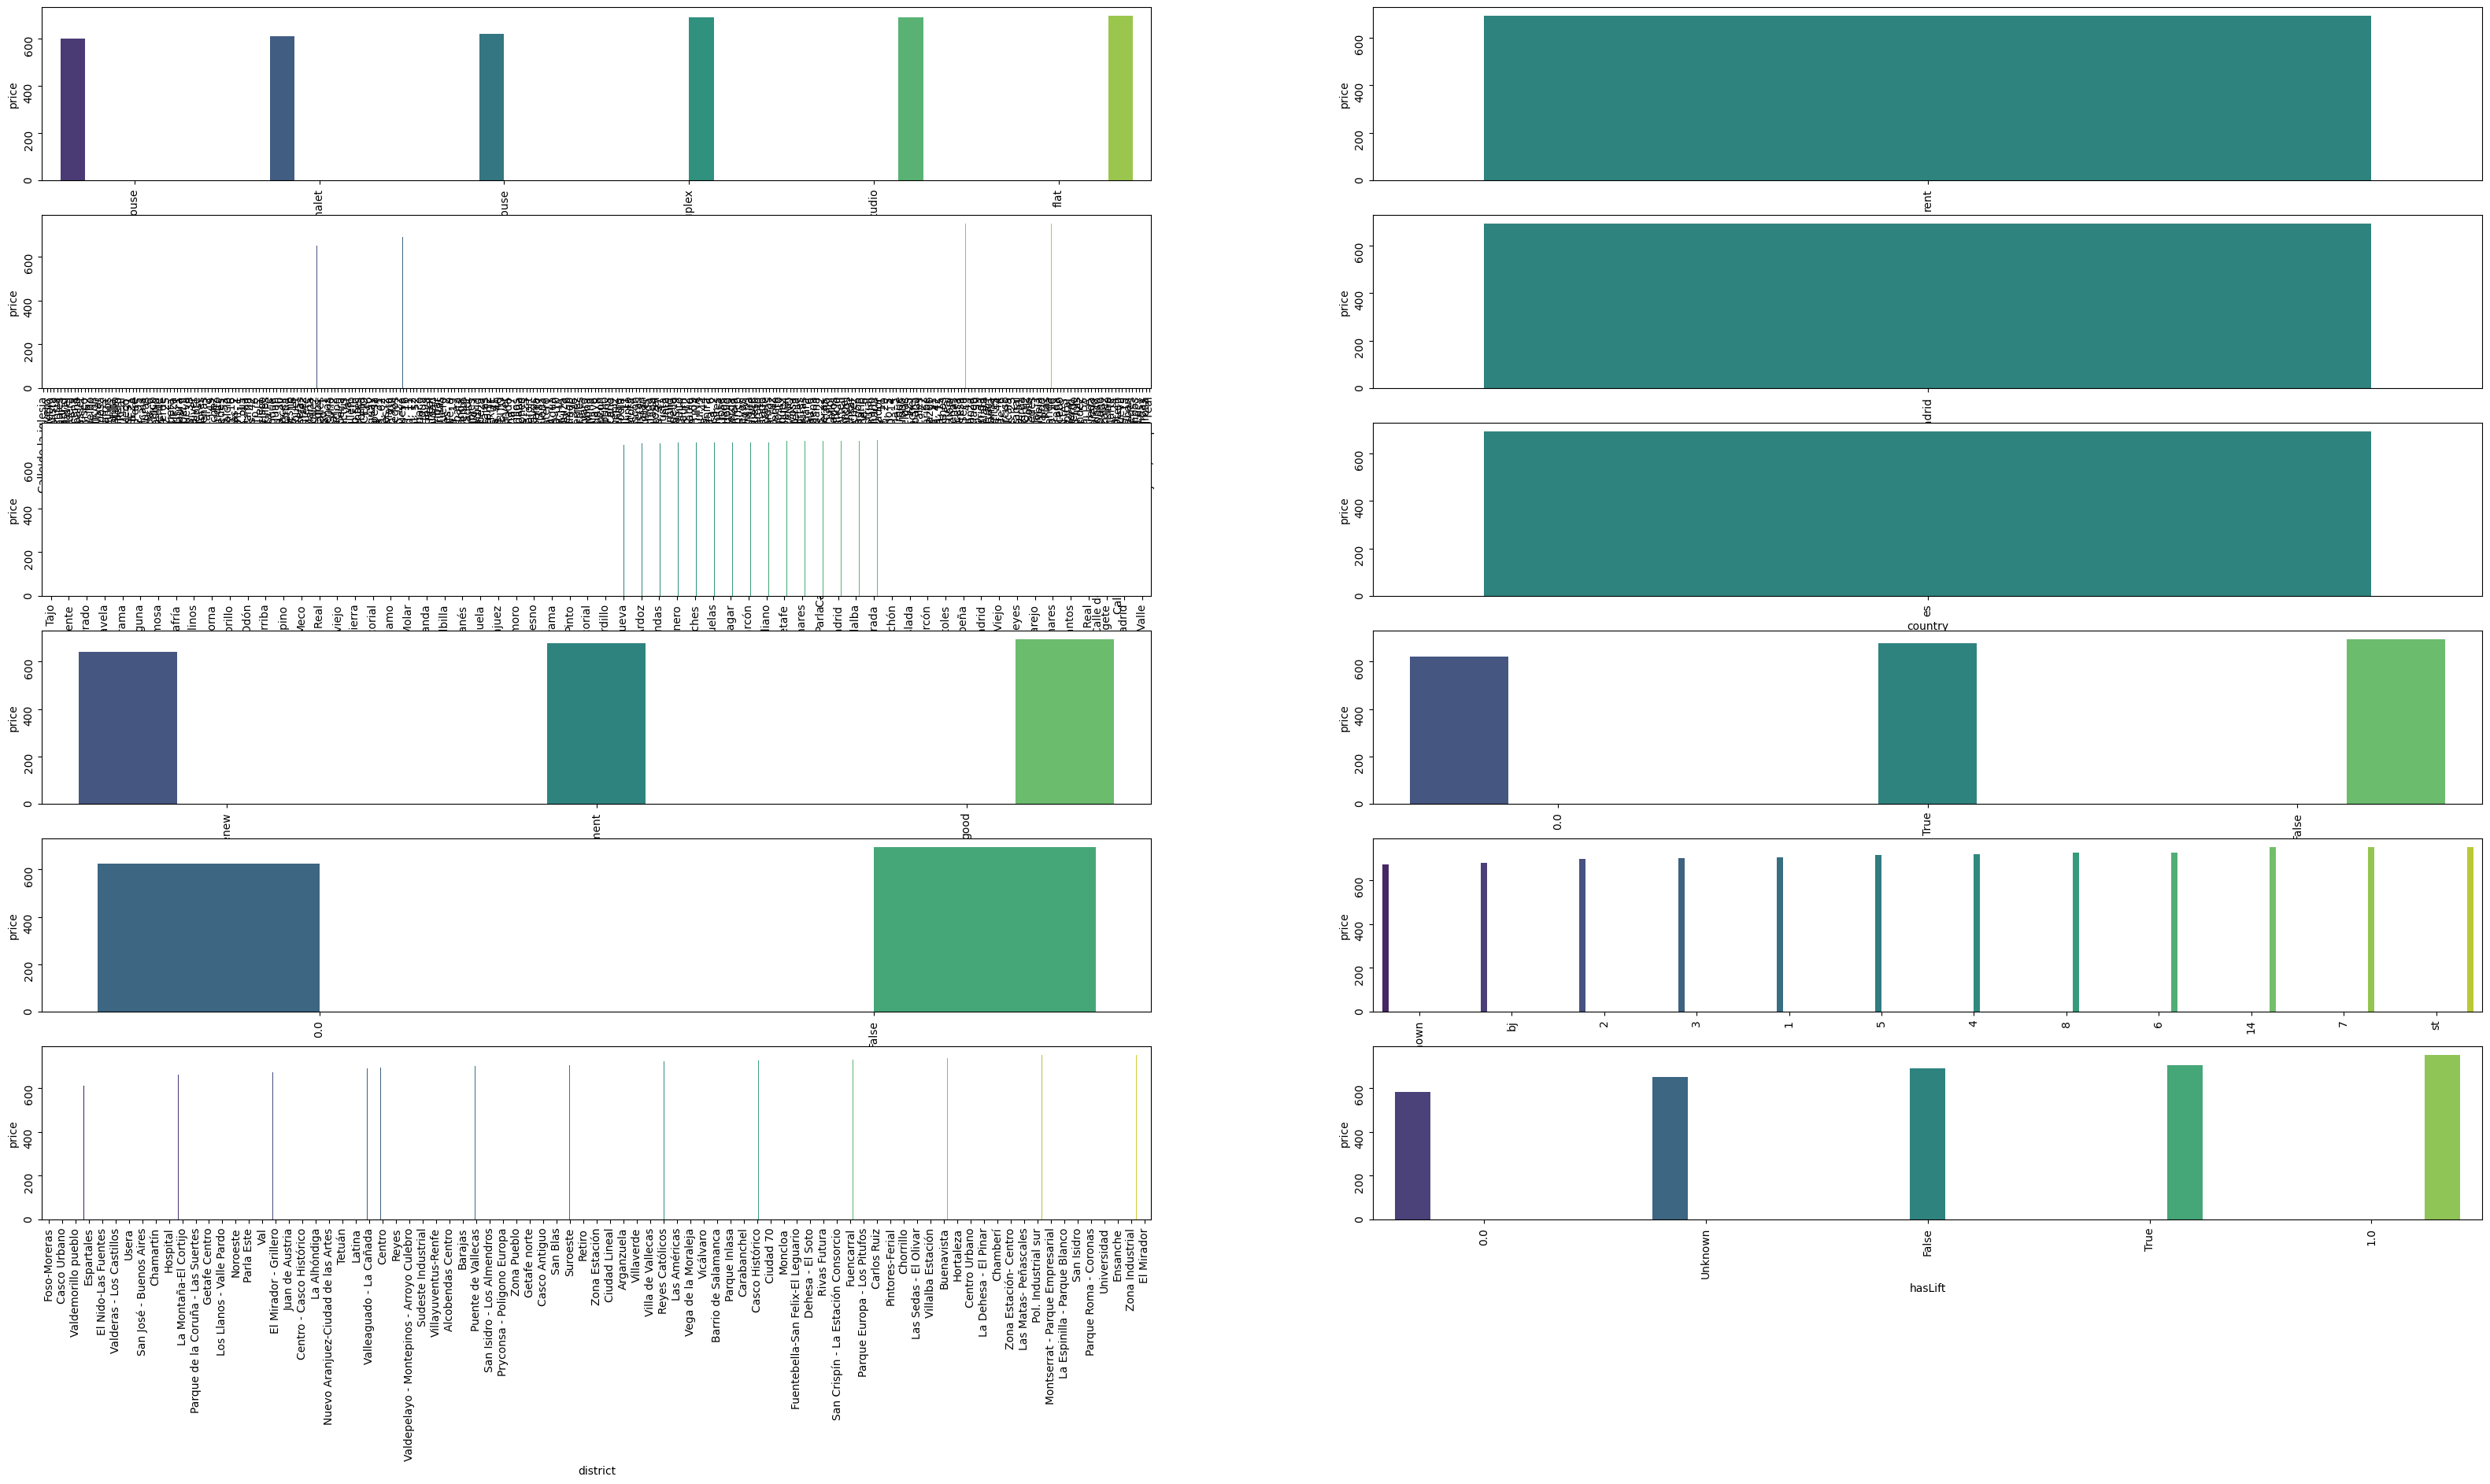

In [24]:
analisis_encoding = se.Analisis_Visual_Encoding(variable_respuesta="price", dataframe=df_filtrado_madrid, lista_variables_categorias= lista_col_categ)

analisis_encoding.crear_boxplot()
analisis_encoding.crear_barplot()

In [25]:
print("\n-------------\n")

for categoria in lista_col_categ:   
    print(f"Estamos analizando la variable {categoria.upper()}")

    # Verificar datos antes de la normalidad
    print("Verificando datos para normalidad...")
    if df_filtrado_madrid[categoria].isna().all():
        print(f"Error: Todos los valores en la columna {categoria} son nulos.")
        continue

    # Normalidad
    try:
        asunciones.identificar_norm
        mmalidad(metodo="kolmogorov")
    except Exception as e:
        print(f"Error al realizar la prueba de normalidad en {categoria}: {e}")

    # Homogeneidad
    print("Verificando datos para homogeneidad...")
    try:
        asunciones.identificar_homogeneidad(columna_categorica=categoria)
    except Exception as e:
        print(f"Error al realizar la prueba de homogeneidad en {categoria}: {e}")

    # Pruebas estadísticas
    print("Ejecutando pruebas estadísticas...")
    try:
        test = se.TestEstadisticos(df_filtrado_madrid, "price", categoria)
        test.run_all_tests()
    except Exception as e:
        print(f"Error al realizar pruebas estadísticas en {categoria}: {e}")

    print("\n###########################\n")



-------------

Estamos analizando la variable PROPERTYTYPE
Verificando datos para normalidad...
Error al realizar la prueba de normalidad en propertyType: name 'asunciones' is not defined
Verificando datos para homogeneidad...
Error al realizar la prueba de homogeneidad en propertyType: name 'asunciones' is not defined
Ejecutando pruebas estadísticas...
Generando grupos...
Grupos generados: ['flat', 'penthouse', 'studio', 'duplex', 'chalet', 'countryHouse']

Realizando test de M...
Error al realizar pruebas estadísticas en propertyType: `axis` is out of bounds for array of dimension 1

###########################

Estamos analizando la variable OPERATION
Verificando datos para normalidad...
Error al realizar la prueba de normalidad en operation: name 'asunciones' is not defined
Verificando datos para homogeneidad...
Error al realizar la prueba de homogeneidad en operation: name 'asunciones' is not defined
Ejecutando pruebas estadísticas...
Generando grupos...
Grupos generados: ['rent'

<div style="background-color: #F74646; padding: 10px; border-left: 6px solid #000080; color: black; border-radius: 10px;">
He elegido Kursall porque la columna "price" no tiene una distribución normal,  
</div>

# Interpretación de Resultados

Dado que hemos aplicado varios tests estadísticos (normalidad, homogeneidad, Mann-Whitney, Kruskal-Wallis, y Tukey), interpretaremos los resultados obtenidos para cada variable categórica.

---

## Para la columna **PropertyType**

Los resultados muestran que no hay homogeneidad entre los grupos y el test de Mann-Whitney no se pudo realizar correctamente debido a la estructura de los datos. Sin embargo, los grupos generados para el análisis son: `flat`, `penthouse`, `studio`, `duplex`, `chalet`, `countryHouse`.

### **En resumen:**
Dado que los datos no cumplen las suposiciones de normalidad ni homogeneidad, pero las categorías representan tipos de propiedades bien definidas, recomendamos utilizar un **Target Encoding**. Este método permite capturar las diferencias en la variable respuesta (`price`) asociadas a cada tipo de propiedad.

---

## Para la columna **Operation**

Los resultados muestran que solo existe una categoría (`rent`), lo que impide realizar comparaciones estadísticas significativas.

### **En resumen:**
Dado que no hay variación en esta variable, no se necesita ningún tipo de encoding. Esta columna podría descartarse del modelo.

---

## Para la columna **Address**

Con más de 300 categorías únicas, las pruebas no son fiables debido a la alta cardinalidad. Aunque el test de Tukey identifica diferencias significativas entre algunas categorías, este nivel de detalle no es útil para un modelo.

### **En resumen:**
Recomendamos descartar esta columna debido a su alta cardinalidad y poca utilidad práctica para el análisis. Si es necesario conservarla, se podría agrupar por zonas o áreas más generales.

---

## Para la columna **Province**

Al tener solo una categoría (`Madrid`), no se pueden realizar pruebas estadísticas ni extraer información útil.

### **En resumen:**
Esta columna puede ser eliminada, ya que no aporta variación al modelo.

---

## Para la columna **Municipality**

El test de Kruskal-Wallis indica diferencias significativas entre las categorías, lo que sugiere que esta variable puede ser relevante para el modelo. Algunas de las categorías son `Madrid`, `San Sebastián de los Reyes`, `Villamanrique de Tajo`, `Rascafría`, etc.

### **En resumen:**
Dado que esta columna tiene muchas categorías pero diferencias significativas, recomendamos utilizar un **Target Encoding**. Esto permitirá capturar la influencia de cada municipio en la variable respuesta (`price`).

---

## Para la columna **NewDevelopment**

Los resultados muestran que no hay homogeneidad en las varianzas entre grupos (`0.0`, `False`, `True`), pero no se encontraron diferencias significativas en el test de Kruskal-Wallis.

### **En resumen:**
Esta variable es categórica con pocas categorías claras, por lo que recomendamos utilizar un **Ordinal Encoding** simple, asignando valores de 0 a 2 a las categorías `0.0`, `False`, y `True`.

---

## Para la columna **HasStaging**

No se encontró evidencia significativa para diferenciar las categorías (`0.0`, `False`) en el test de Kruskal-Wallis.

### **En resumen:**
Dado que no hay diferencias significativas, esta columna podría ser descartada del modelo o codificada con un **Binary Encoding**.

---

## Para la columna **Floor**

El test de Kruskal-Wallis indica diferencias significativas entre las categorías (`3`, `bj`, `2`, `Unknown`, etc.), lo que sugiere que esta variable es importante.

### **En resumen:**
Recomendamos un **Ordinal Encoding**, ya que las categorías representan niveles ordenados (pisos).

---

## Para la columna **District**

La variable tiene muchas categorías (algunas con valores nulos), pero los resultados de las pruebas no son significativos.

### **En resumen:**
Dado que esta variable tiene alta cardinalidad, recomendamos agrupar los distritos en categorías más amplias (por ejemplo, regiones) antes de aplicar un **Target Encoding**.

---

## Para la columna **HasLift**

Los resultados muestran diferencias significativas en el test de Kruskal-Wallis. Las categorías incluyen `1.0`, `0.0`, `Unknown`, `False`, y `True`.

### **En resumen:**
Recomendamos utilizar un **Ordinal Encoding** para capturar la relación entre esta variable y el precio.


In [26]:
y = df_filtrado_madrid['price']
X = df_filtrado_madrid.drop('price', axis=1)

In [27]:
tar_encoder = TargetEncoder(lista_col_categ)
df_filtrado_madrid = tar_encoder.fit_transform(df_filtrado_madrid, df_filtrado_madrid["price"])
df_filtrado_madrid


price  propertyType  operation  size  exterior  rooms  bathrooms  \
0   750.00        697.55     692.91 60.00      True      1          1   
1   750.00        697.55     692.91 70.00      True      2          1   
2   400.00        673.28     692.91 67.00      True      2          2   
3   590.00        697.55     692.91 70.00      True      3          2   
4   684.00        689.81     692.91 45.00      True      0          1   
..     ...           ...        ...   ...       ...    ...        ...   
353 640.00        697.55     692.91 69.00      True      2          1   
354 700.00        697.55     692.91 54.00      True      1          1   
355 700.00        697.55     692.91 59.00      True      1          1   
356 700.00        697.55     692.91 75.00      True      2          1   
357 695.00        697.55     692.91 62.00     False      2          1   

     address  province  municipality  country  showAddress  distance  status  \
0     700.34    692.91        705.63   692.91         True      7037  693.87   
1     700.34    692.91        701.40   692.91        False     16145  693.87   
2     671.22    692.91        654.80   692.91        False     55041  693.87   
3     679.52    692.91        679.52   692.91        False     56596  693.87   
4     691.75    692.91        705.63   692.91         True     10656  693.87   
..       ...       ...           ...      ...          ...       ...     ...   
353   686.03    692.91        686.03   692.91         True     29311  693.87   
354   693.84    692.91        696.16   692.91        False     11656  693.87   
355   693.84    692.91        705.63   692.91         True      7529  693.87   
356   693.84    692.91        699.61   692.91         True     30359  693.87   
357   693.19    692.91        693.19   692.91         True     15162  693.87   

     newDevelopment  hasStaging  floor  district  hasLift  priceByArea_knn  
0            681.09      681.09 697.64    701.24   700.34            13.00  
1            681.09      681.09 678.66    700.19   675.47            11.00  
2            681.09      681.09 696.09    645.66   675.47             6.00  
3            681.09      681.09 671.74    645.66   675.47             8.00  
4            694.40      693.72 671.74    645.66   673.70            13.30  
..              ...         ...    ...       ...      ...              ...  
353          694.40      693.72 696.09    645.66   701.99             9.00  
354          694.40      693.72 701.70    688.60   701.99            13.00  
355          694.40      693.72 697.47    701.64   701.99            12.00  
356          694.40      693.72 701.70    693.84   689.68             9.00  
357          694.40      693.72 697.64    693.19   689.68            11.00  

[352 rows x 20 columns]

### Outliers

In [33]:
GestorOutliersUnivariados = so.GestionOutliersUnivariados(df_filtrado_madrid)

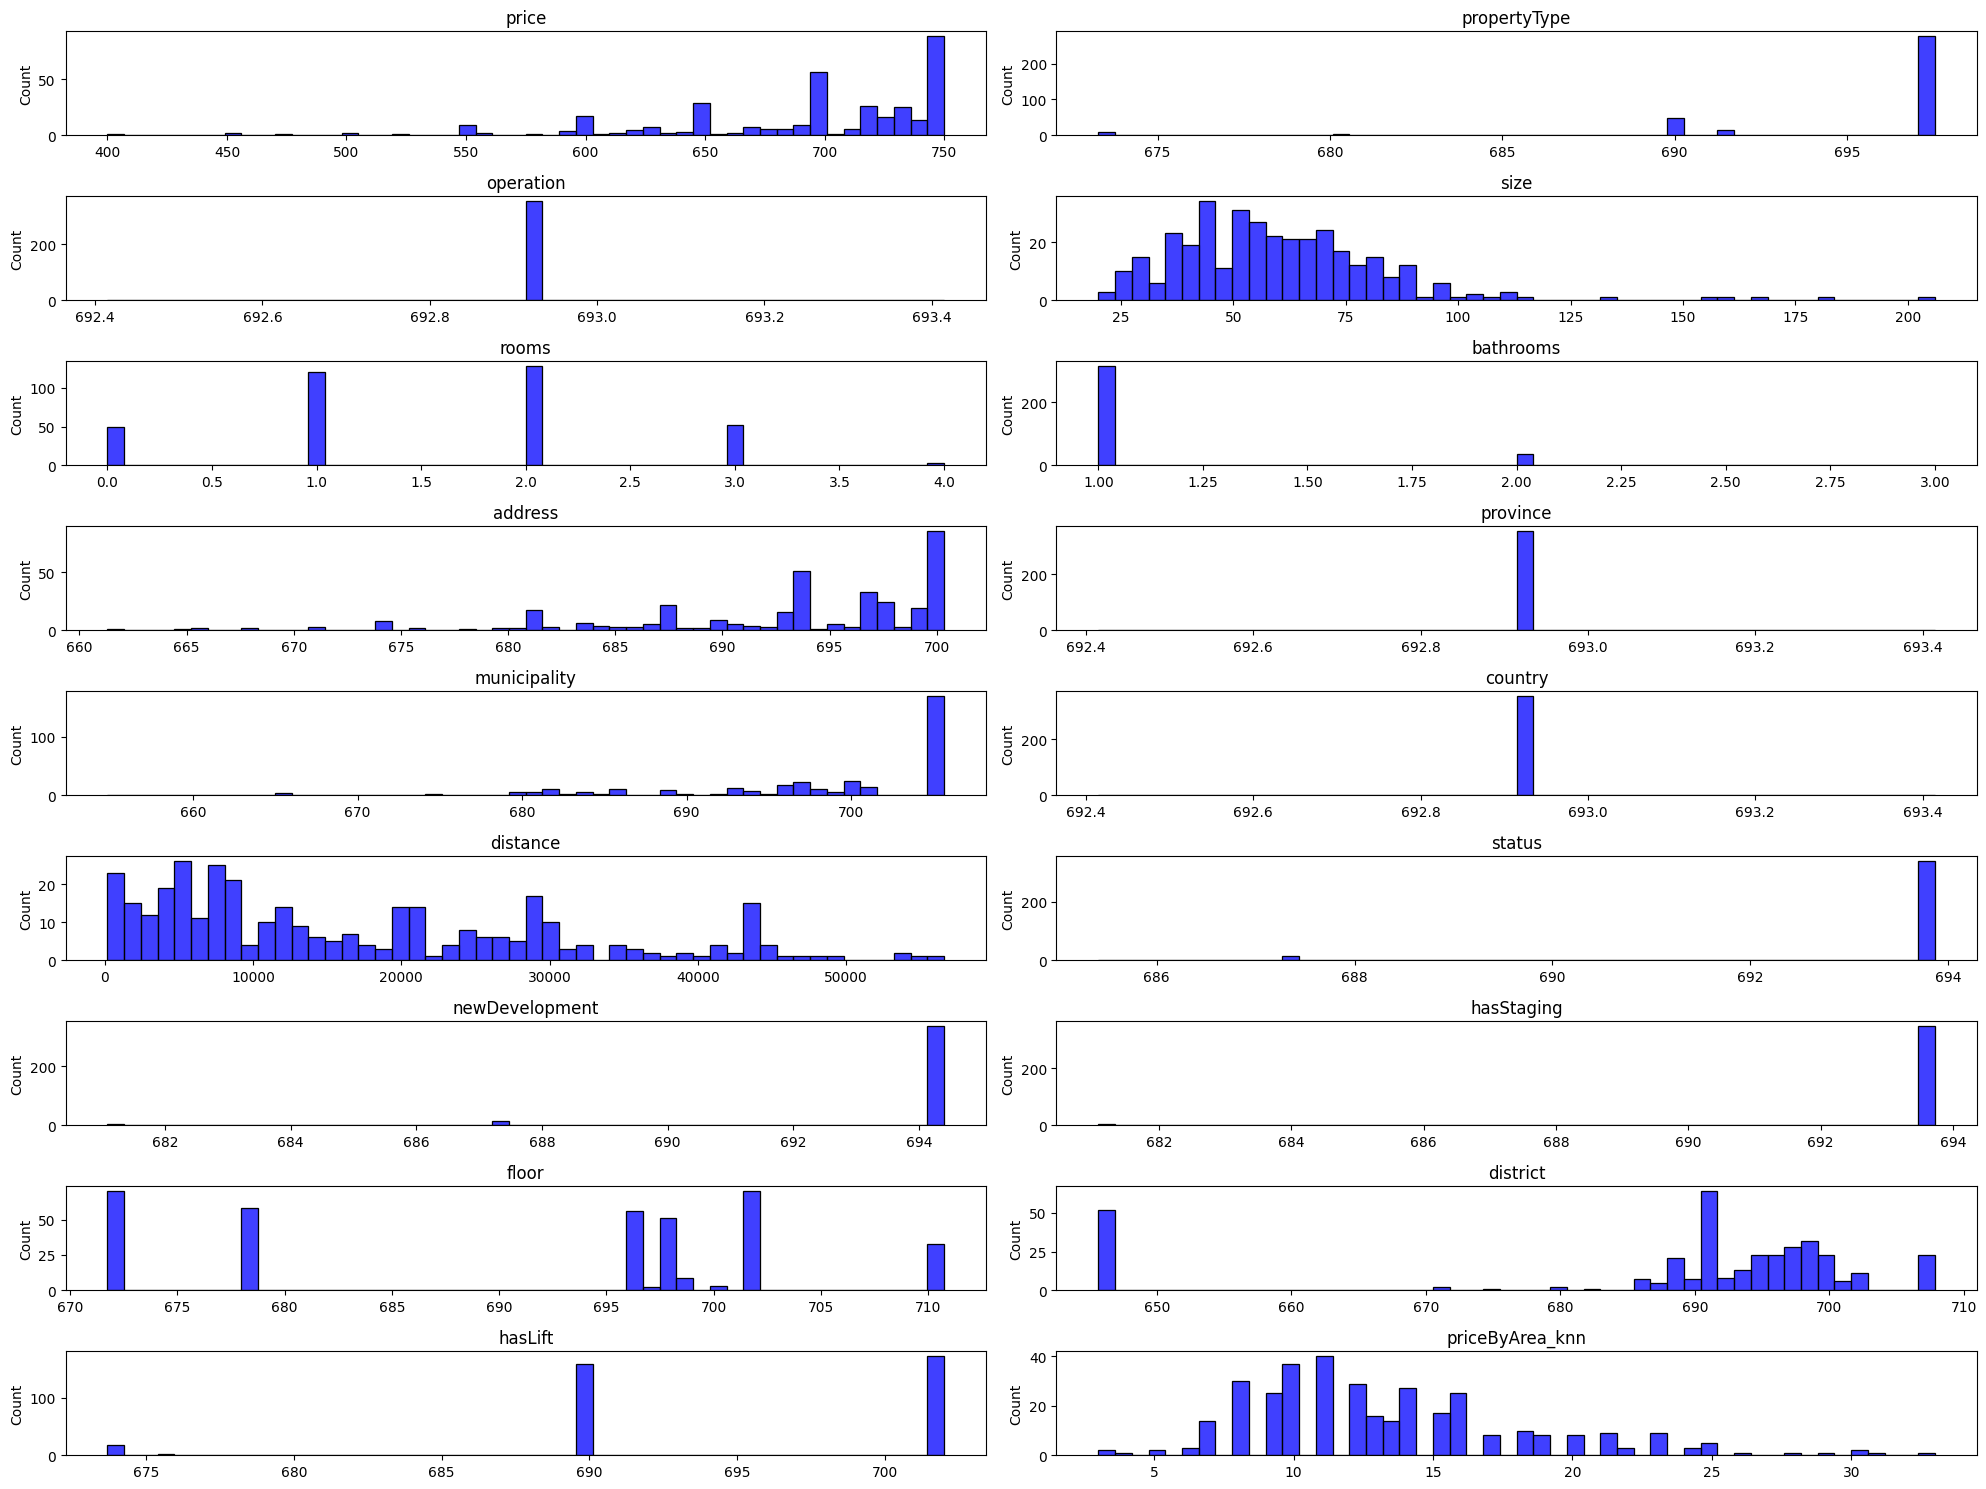

In [34]:
GestorOutliersUnivariados.visualizar_outliers_univariados()

In [35]:
outliers_iqr = GestorOutliersUnivariados.detectar_outliers_iqr()

La cantidad de outliers que tenemos para la columna PRICE es 6
La cantidad de outliers que tenemos para la columna PROPERTYTYPE es 76
La cantidad de outliers que tenemos para la columna SIZE es 11
La cantidad de outliers que tenemos para la columna ROOMS es 3
La cantidad de outliers que tenemos para la columna BATHROOMS es 38
La cantidad de outliers que tenemos para la columna ADDRESS es 9
La cantidad de outliers que tenemos para la columna MUNICIPALITY es 13
La cantidad de outliers que tenemos para la columna STATUS es 15
La cantidad de outliers que tenemos para la columna NEWDEVELOPMENT es 17
La cantidad de outliers que tenemos para la columna HASSTAGING es 4
La cantidad de outliers que tenemos para la columna DISTRICT es 55
La cantidad de outliers que tenemos para la columna PRICEBYAREA_KNN es 7


In [38]:
GestorOutliersMultivariados = so.GestionOutliersMultivariados(df_filtrado_madrid)

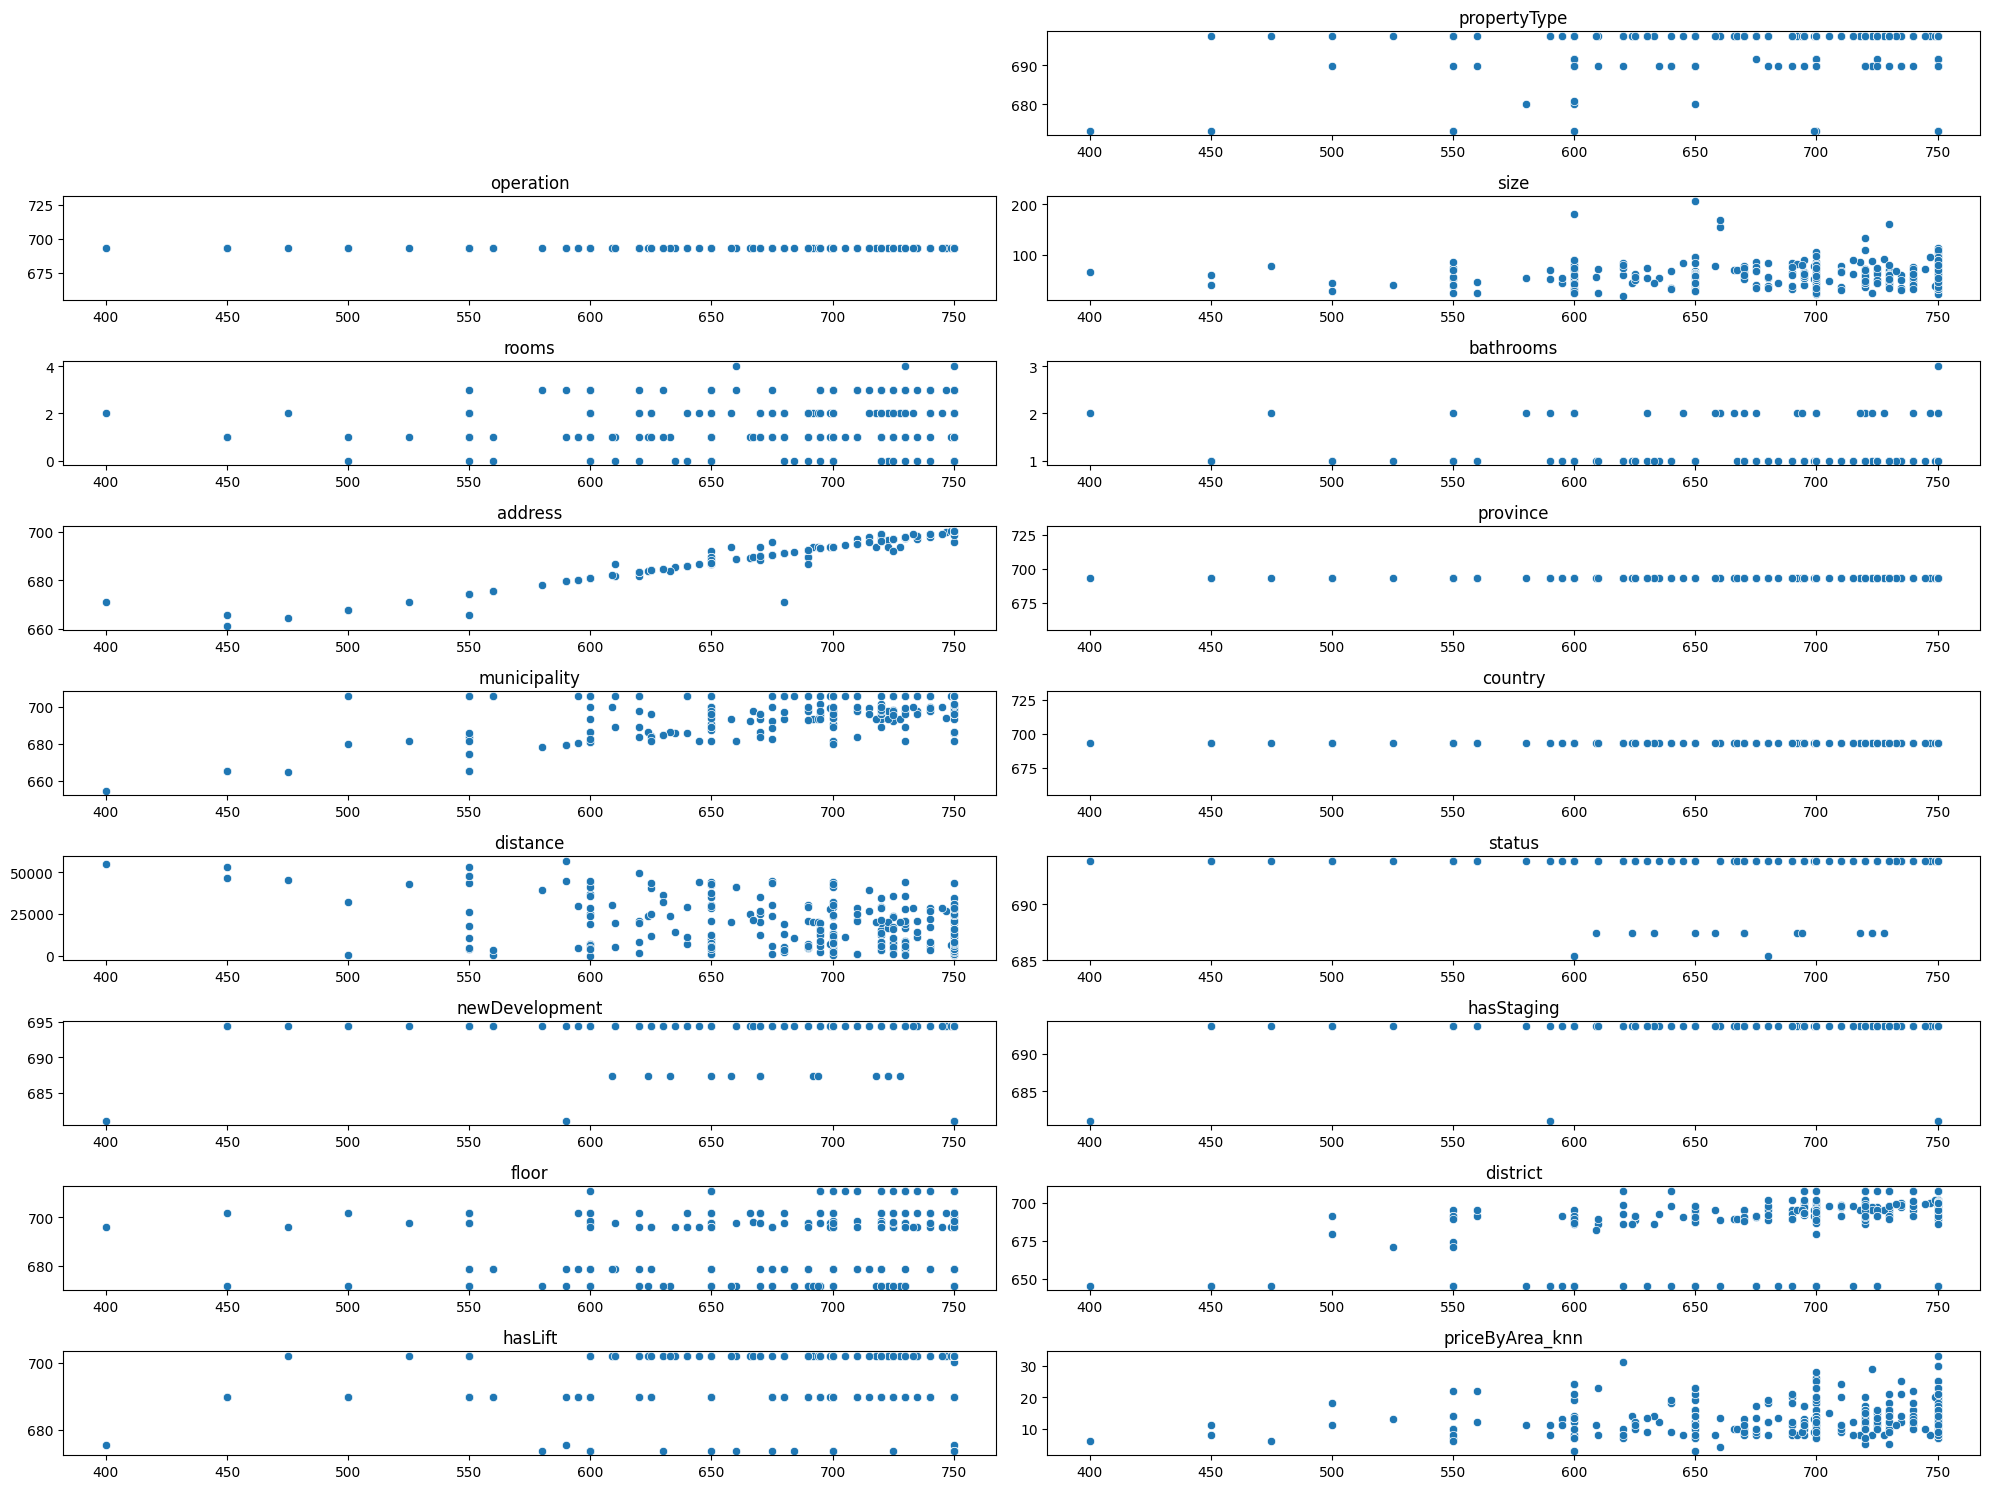

In [39]:
GestorOutliersMultivariados.visualizar_outliers_bivariados("price")

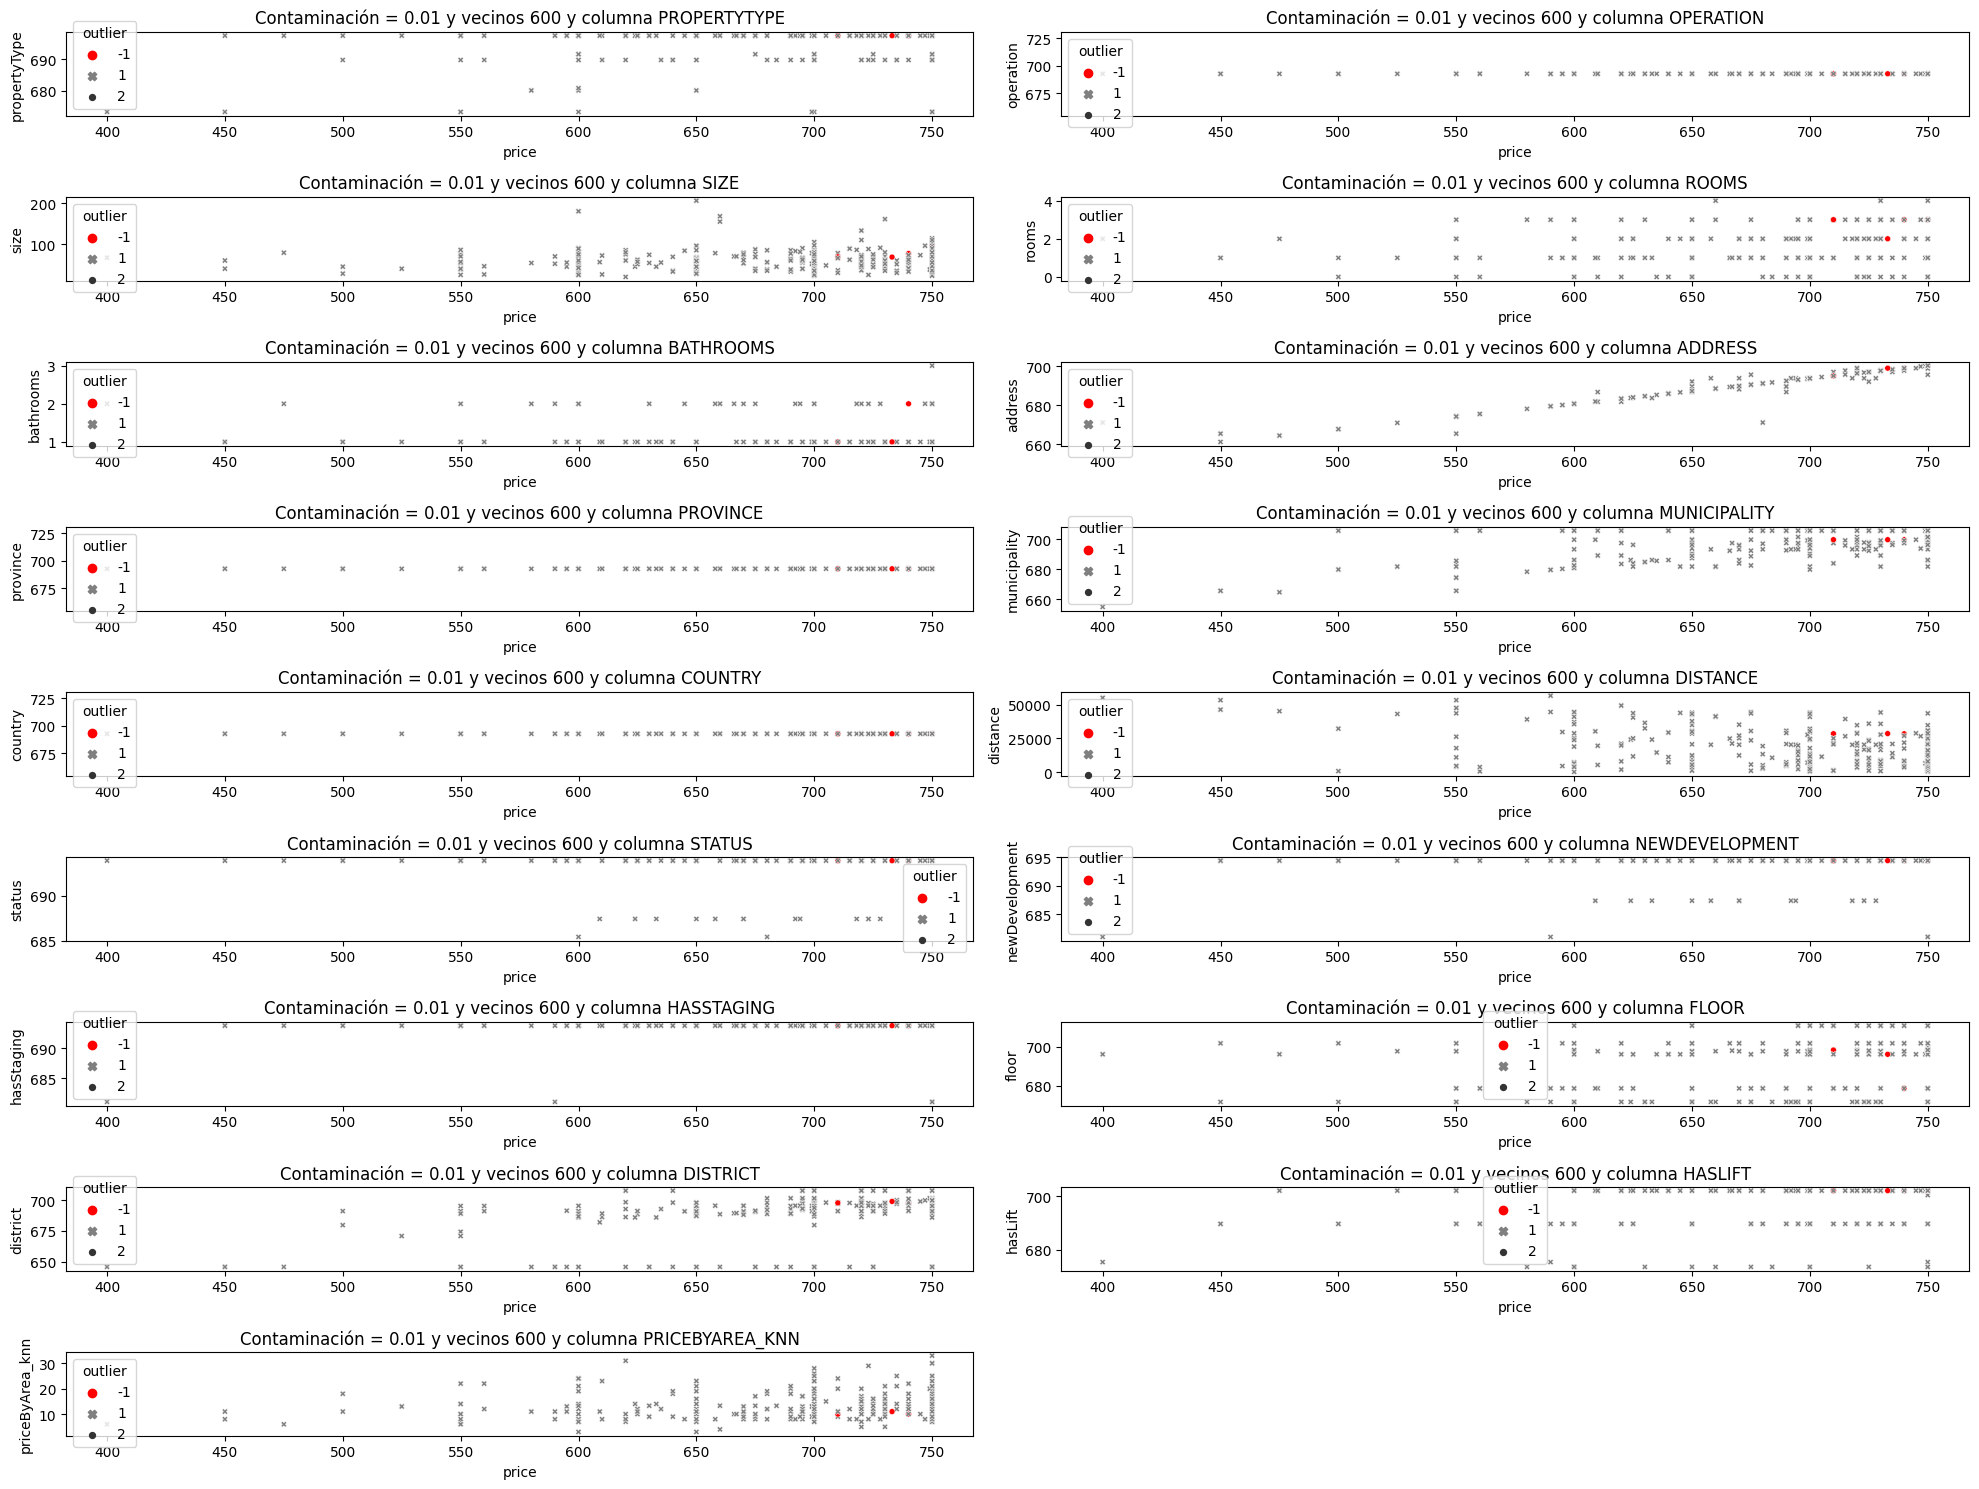

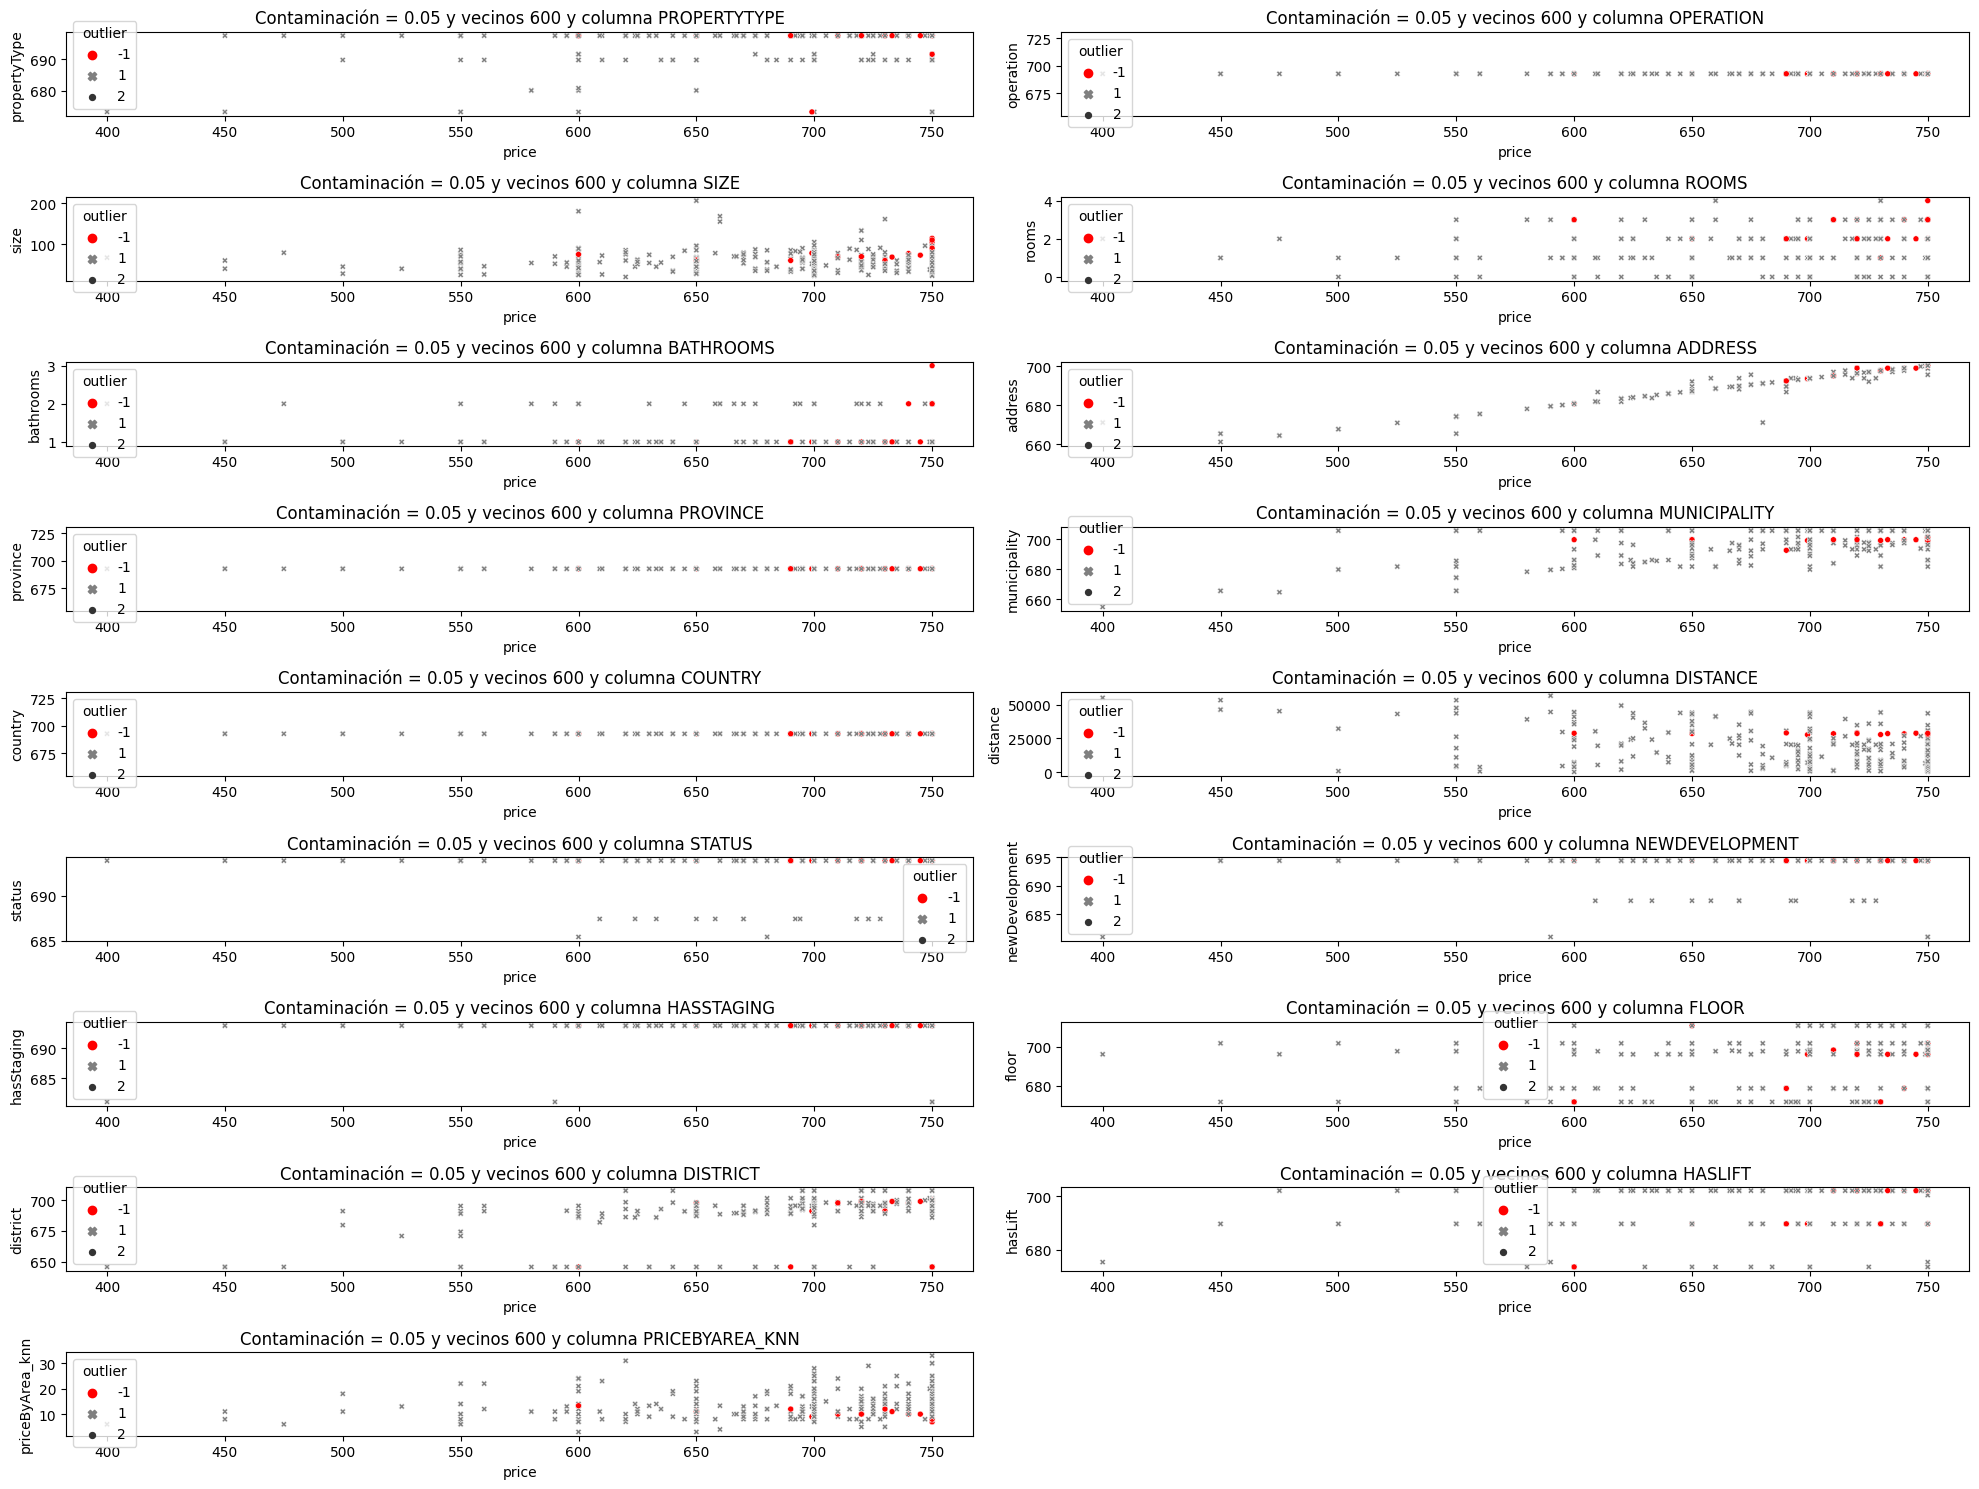

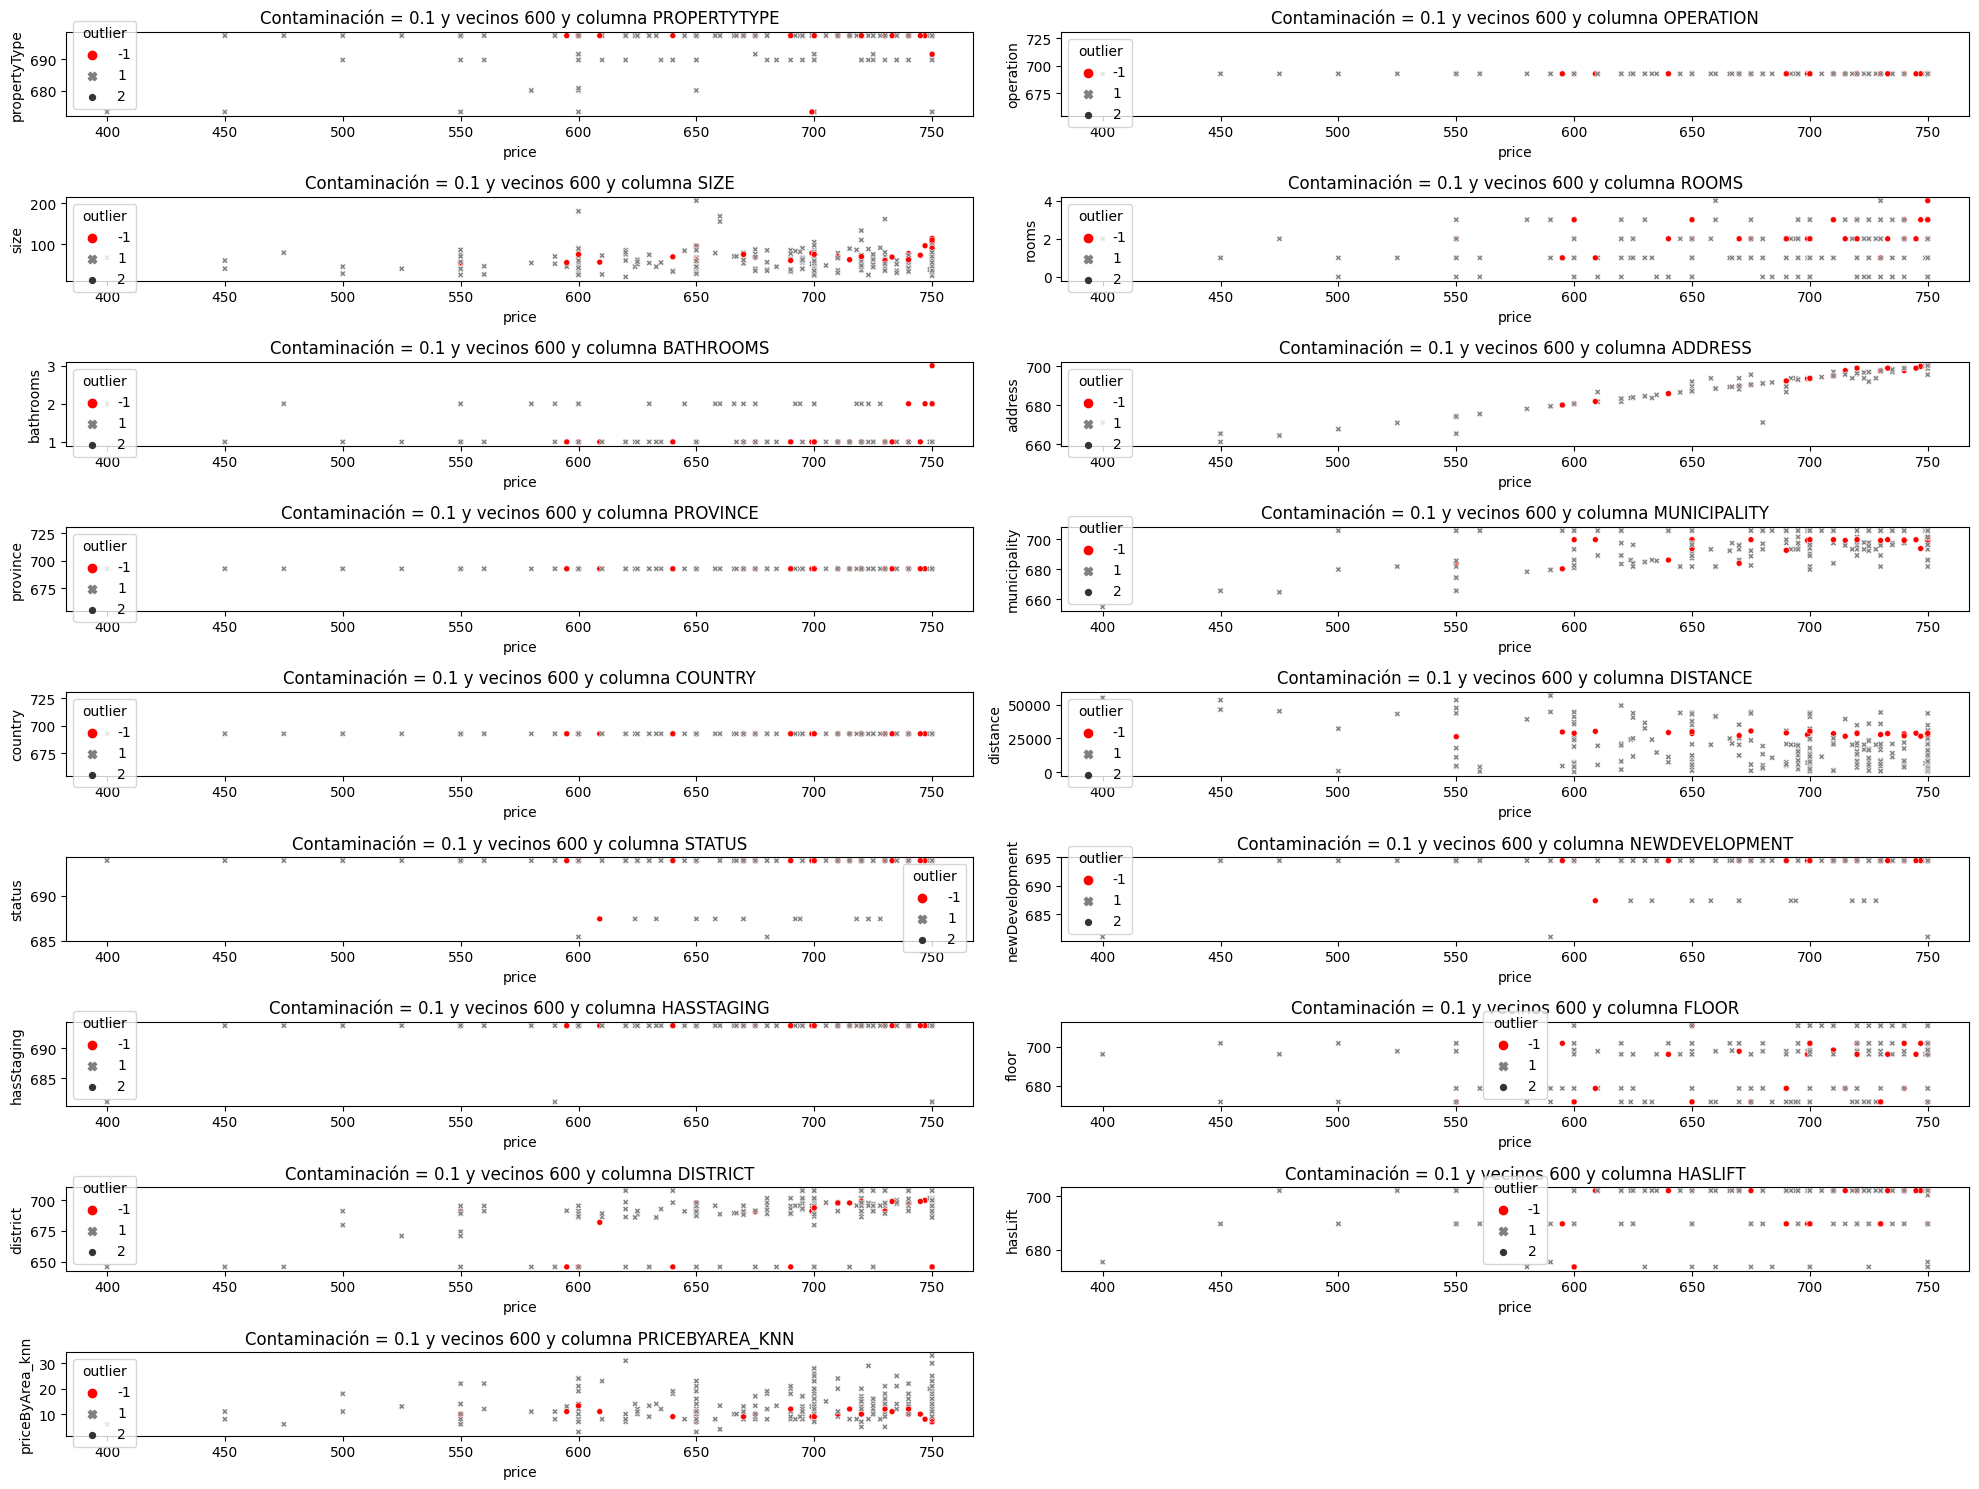

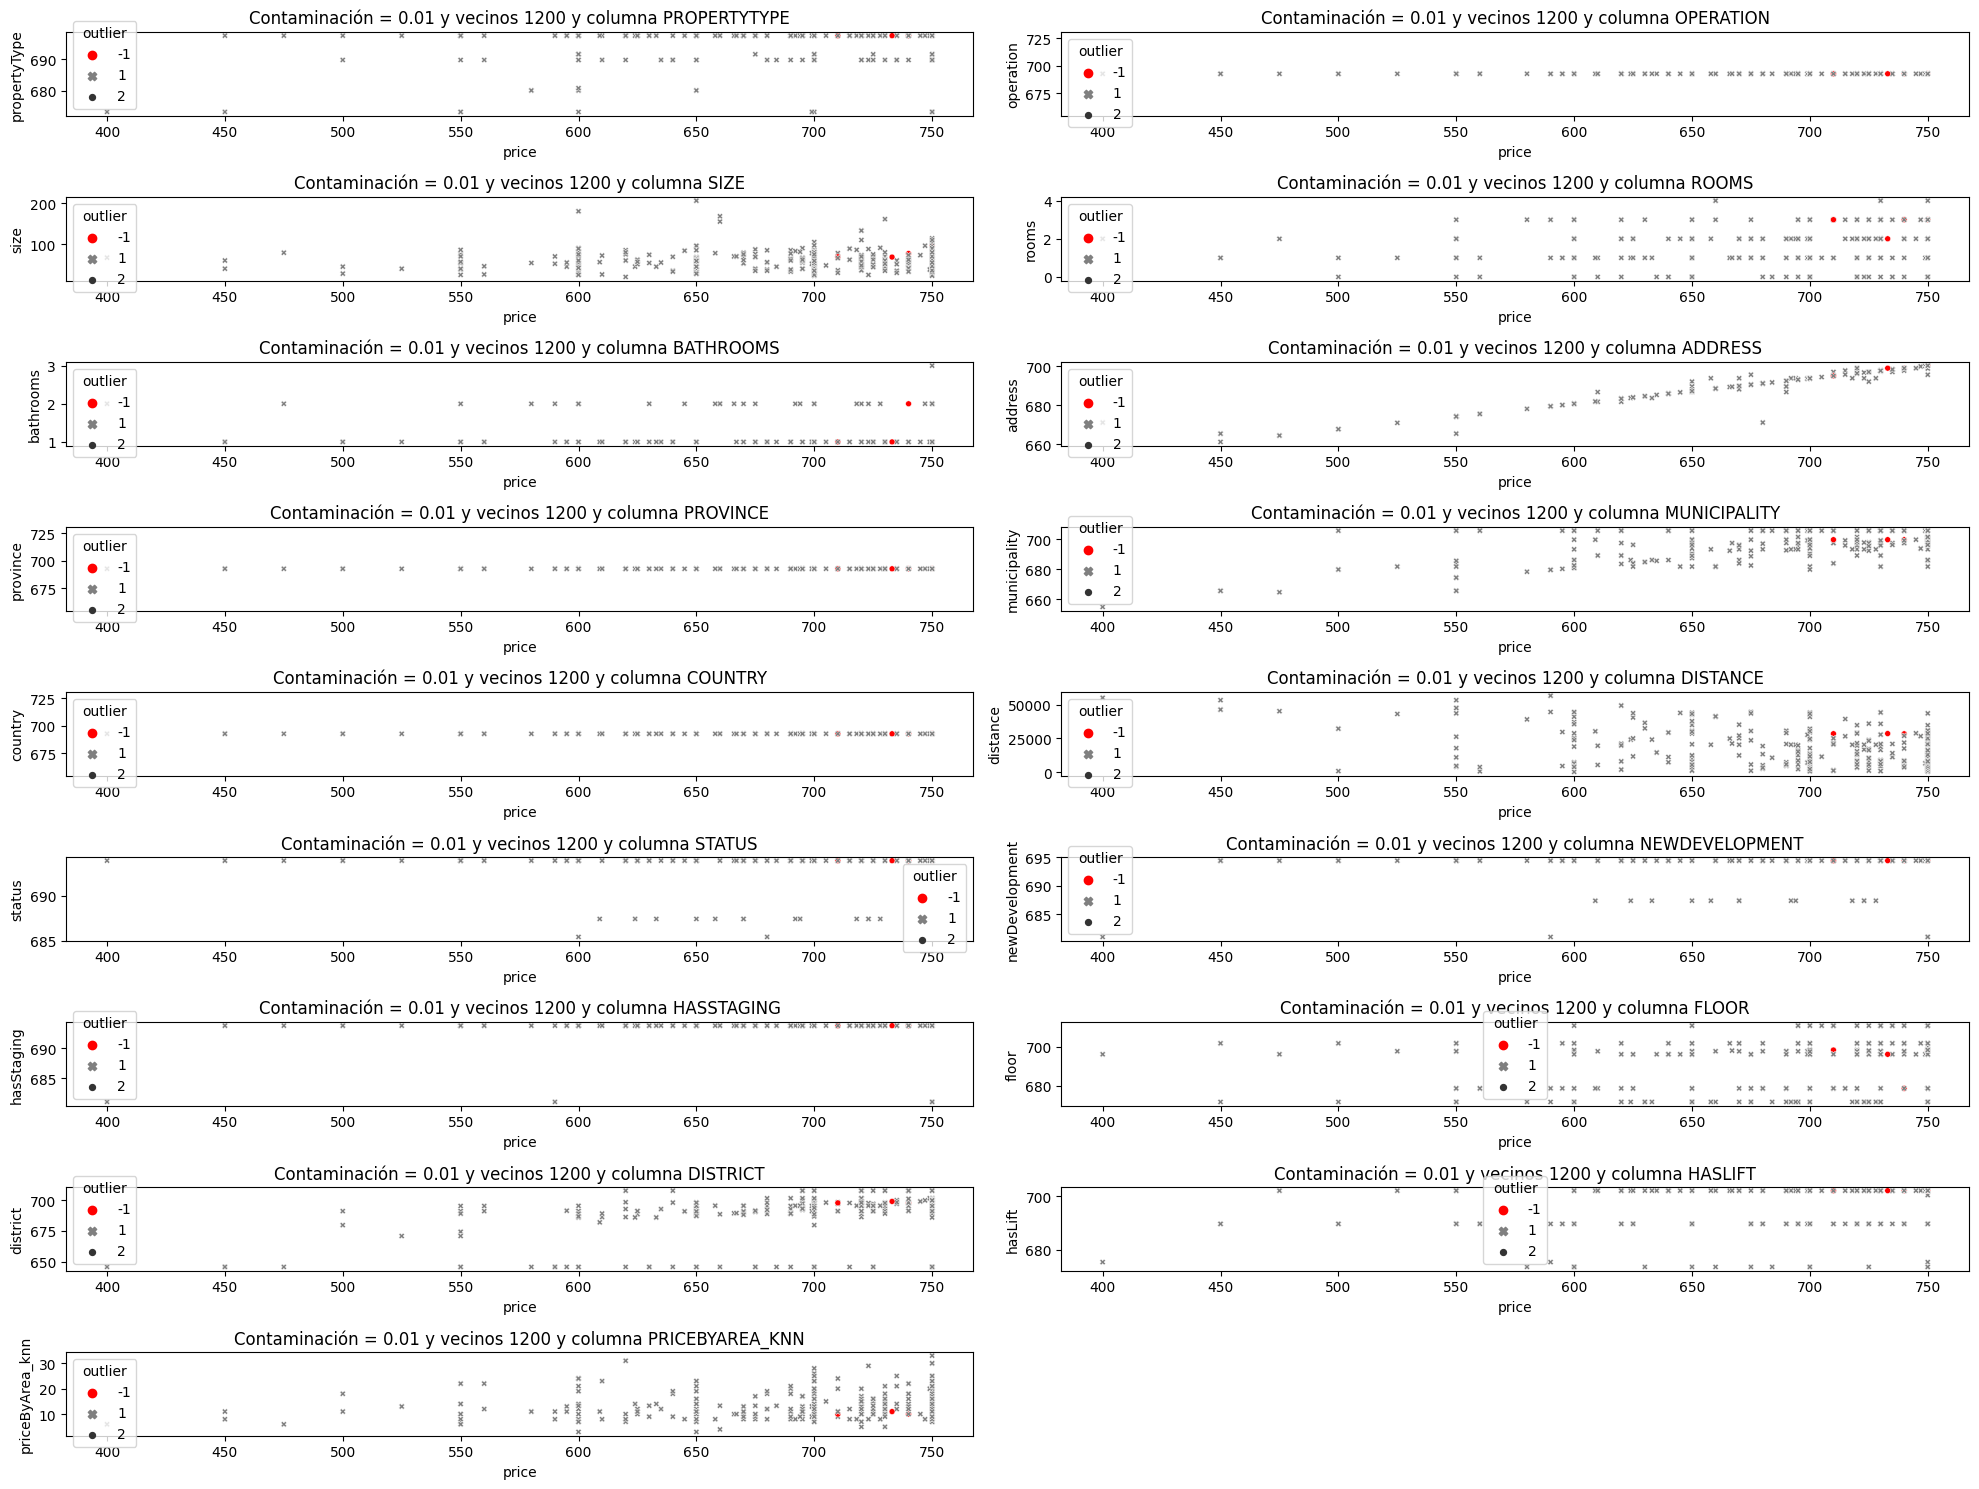

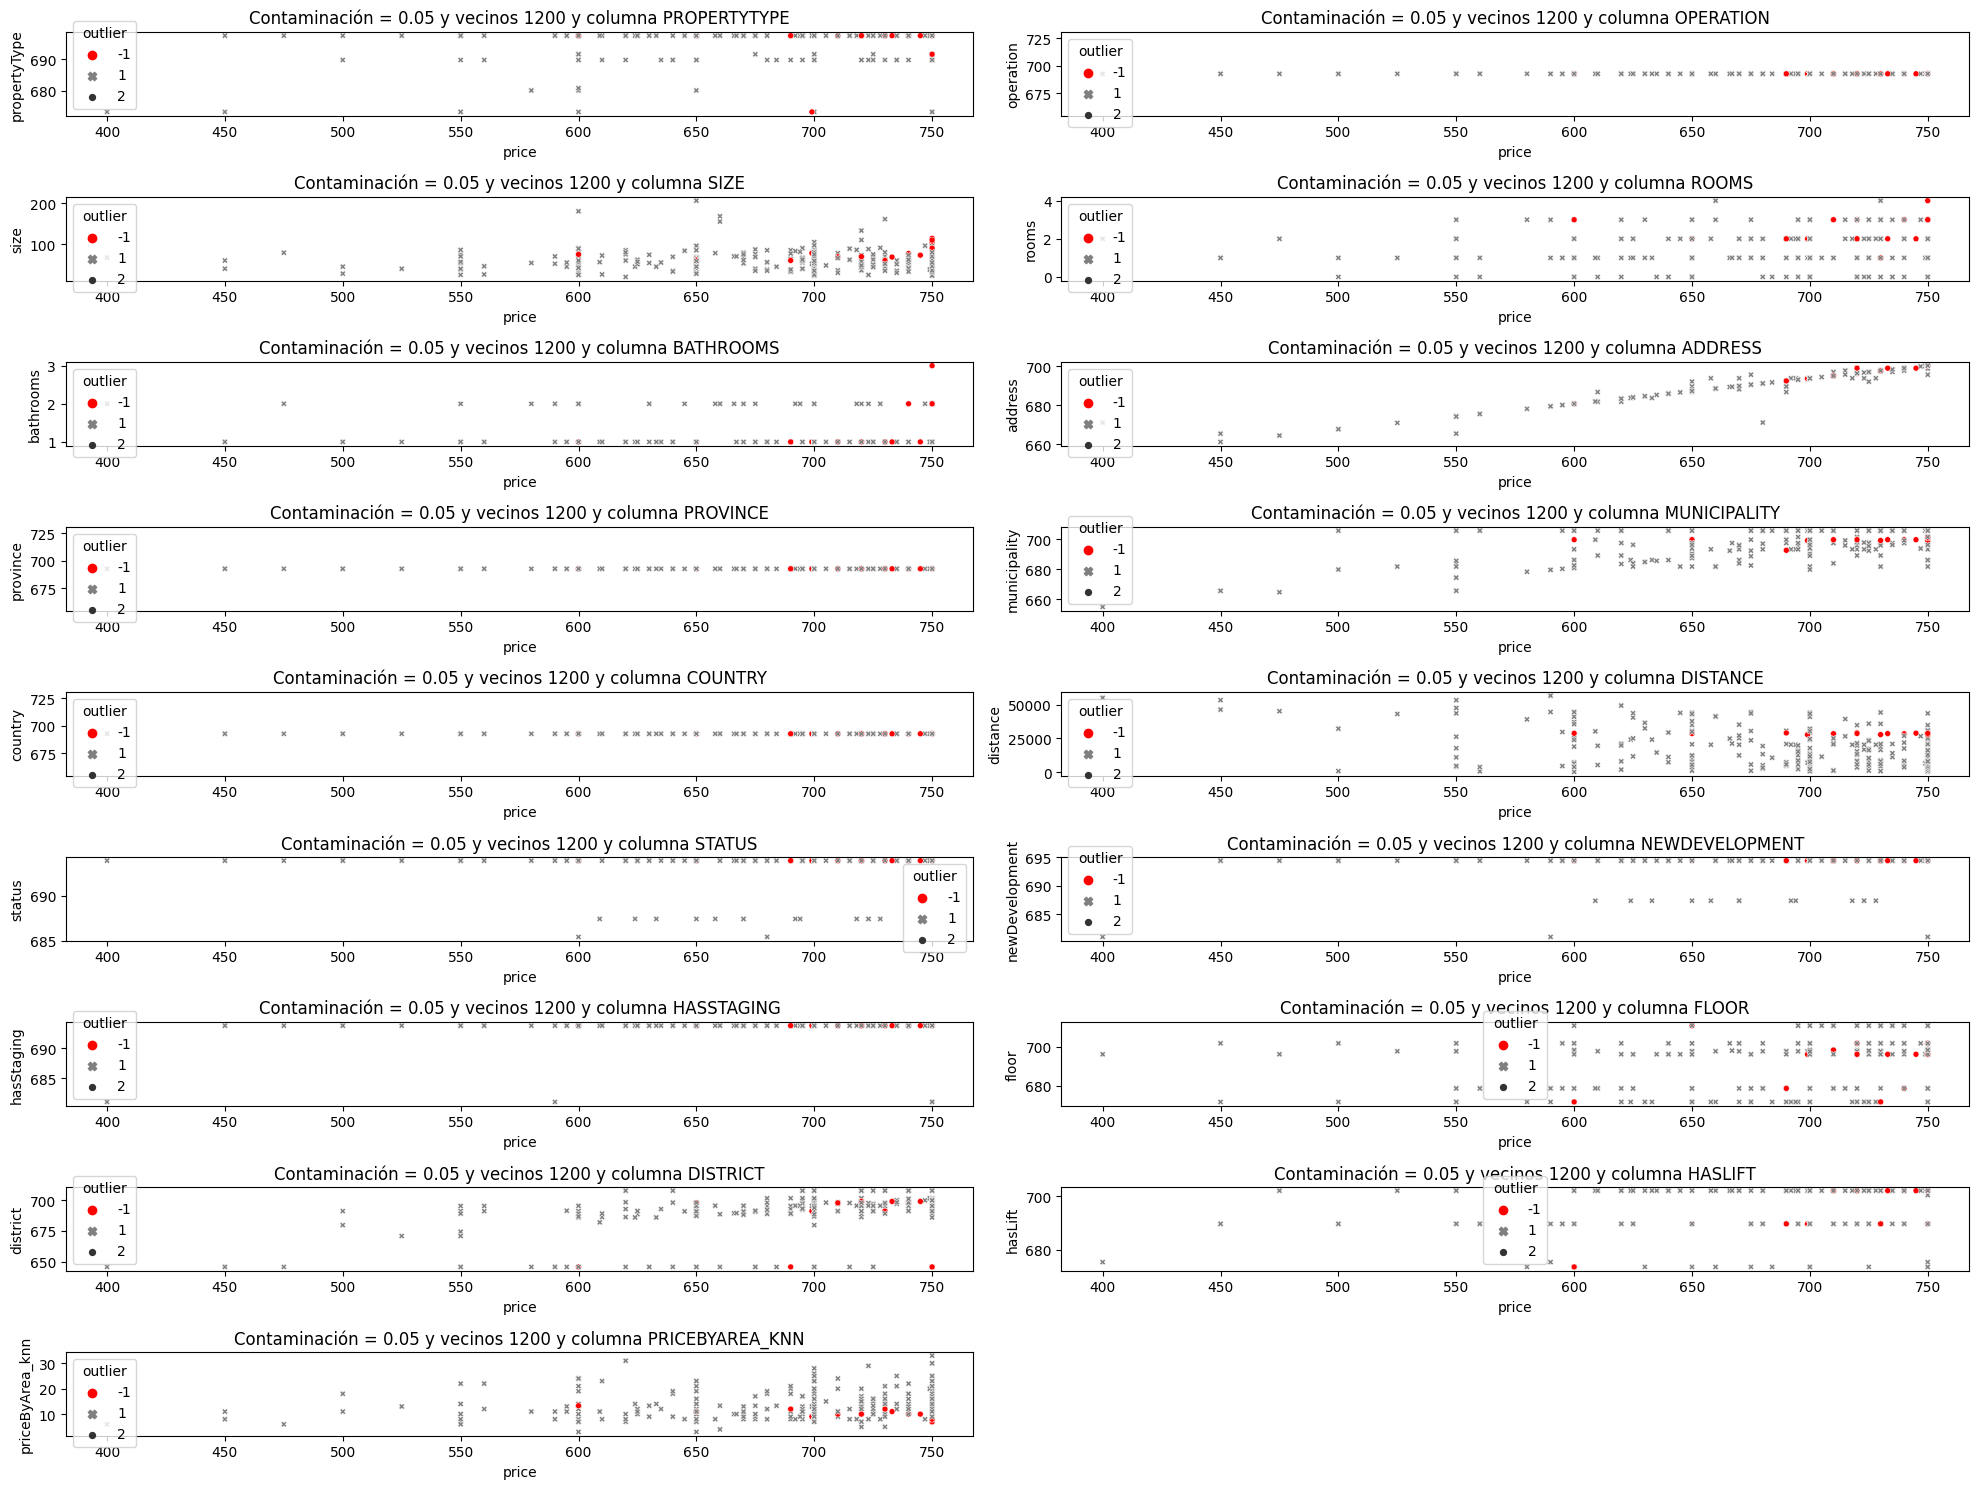

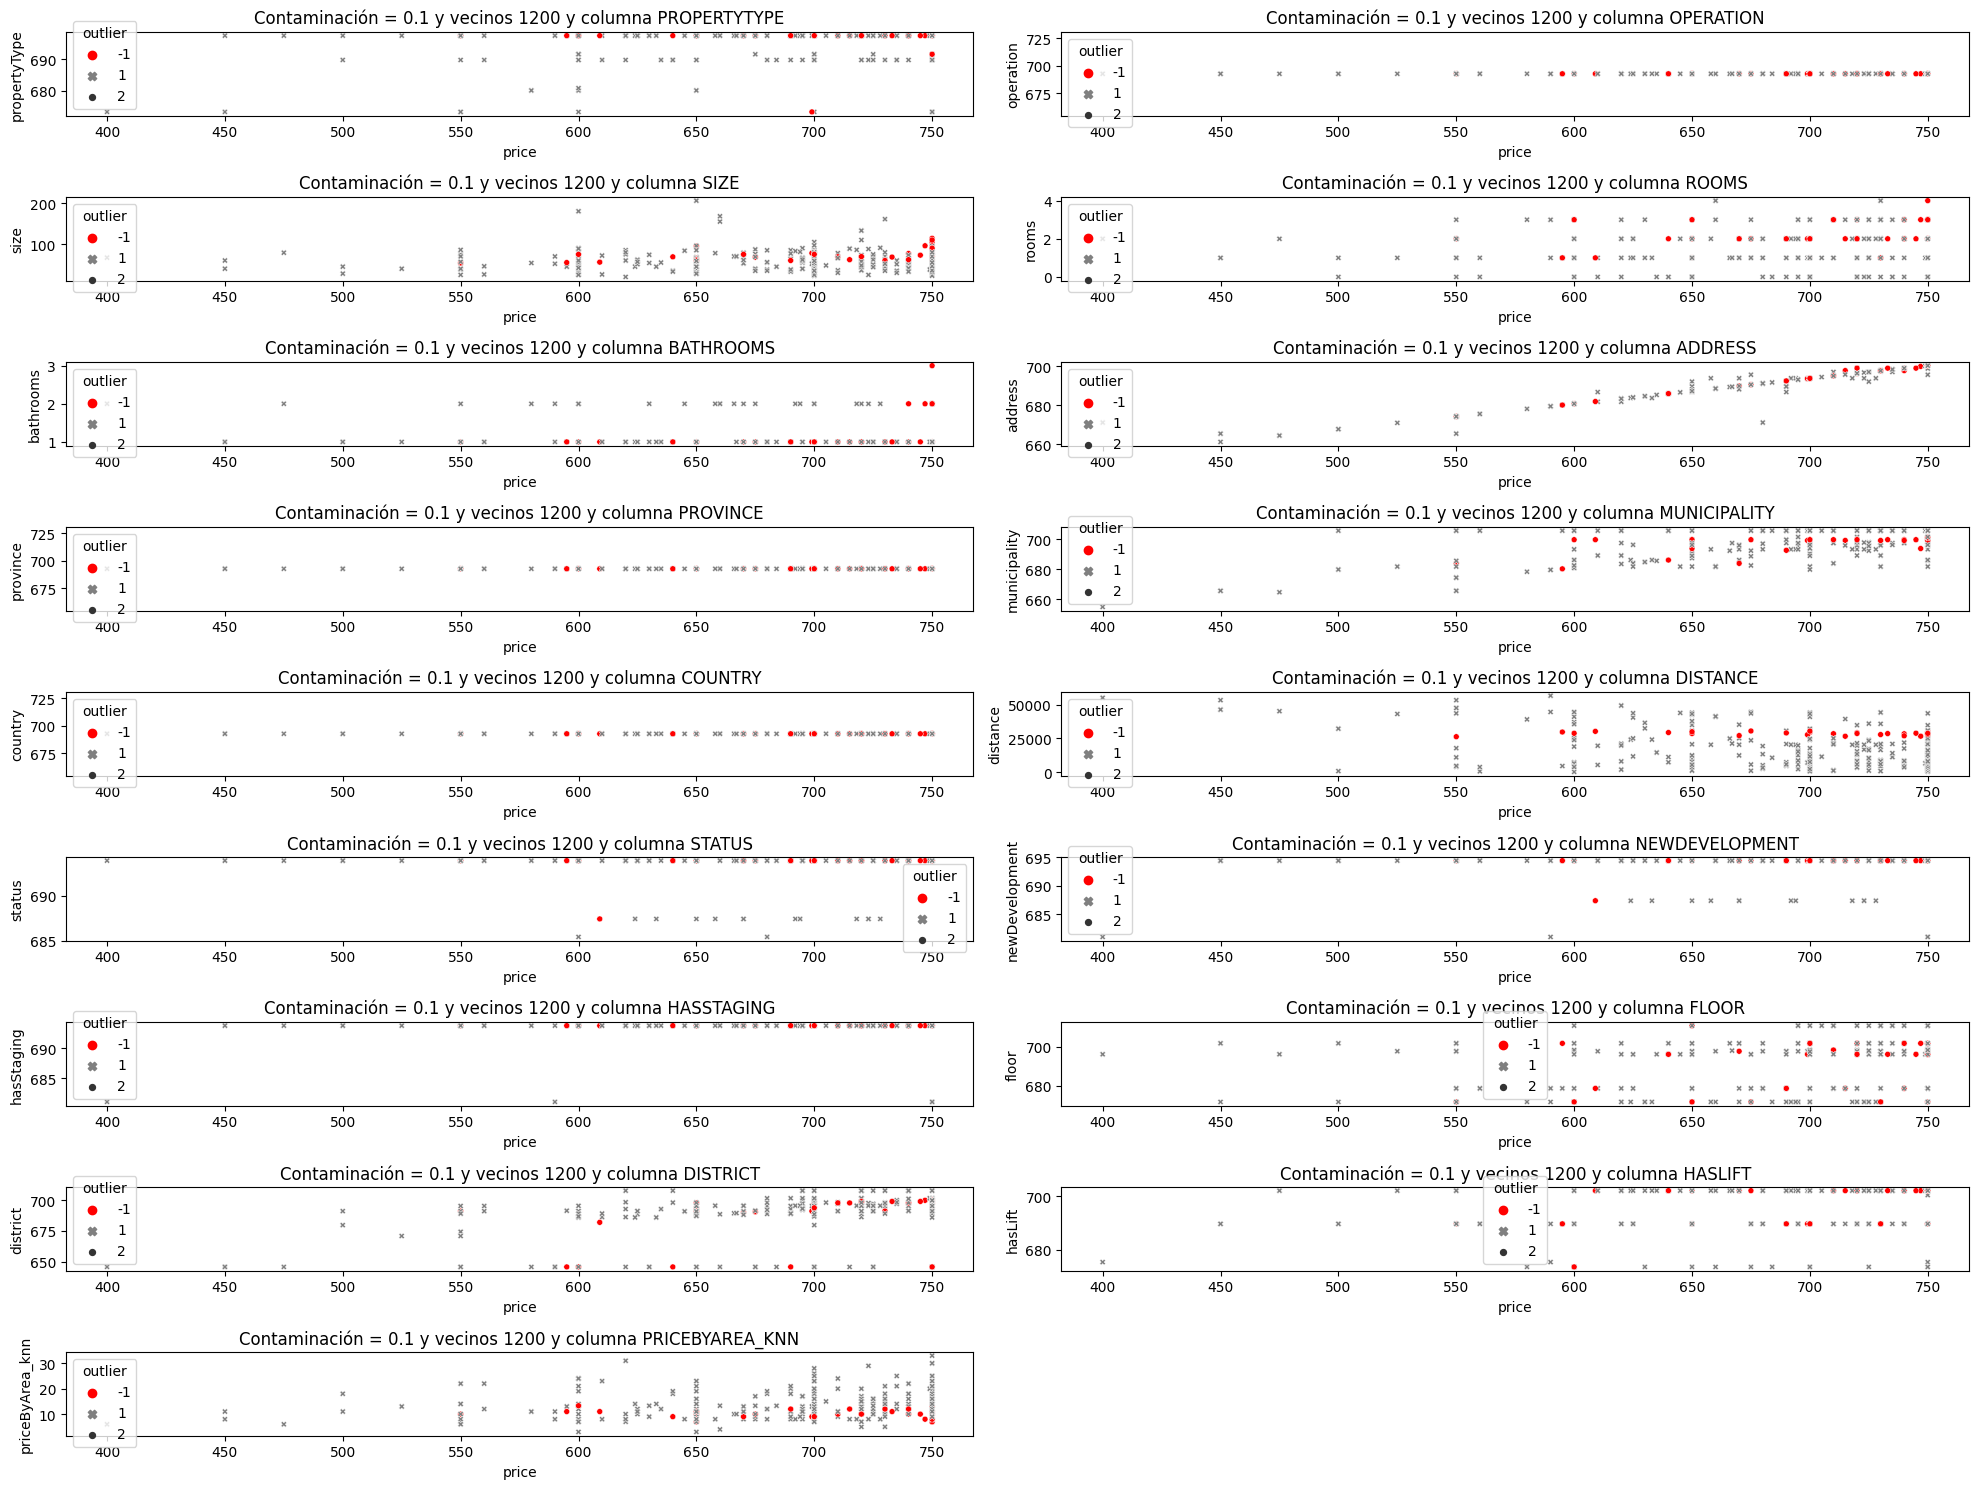

In [40]:
GestorOutliersMultivariados.explorar_outliers_lof("price")

In [41]:
df_filtrado_madrid = GestorOutliersMultivariados.detectar_outliers_if(contaminacion=0.05)

In [42]:
df_filtrado_madrid = GestorOutliersMultivariados.imputar_outliers(data = df_filtrado_madrid, metodo = "mediana")
df_filtrado_madrid.head()

price  propertyType  operation  size  exterior  rooms  bathrooms  address  \
0 710.00        697.55     692.91 55.00      True      2          1   695.14   
1 710.00        697.55     692.91 55.00      True      2          1   695.14   
2 710.00        697.55     692.91 55.00      True      2          1   695.14   
3 710.00        697.55     692.91 55.00      True      2          1   695.14   
4 684.00        689.81     692.91 45.00      True      0          1   691.75   

   province  municipality  country  showAddress  distance  status  \
0    692.91        705.63   692.91         True 11,596.50  693.87   
1    692.91        705.63   692.91        False 11,596.50  693.87   
2    692.91        705.63   692.91        False 11,596.50  693.87   
3    692.91        705.63   692.91        False 11,596.50  693.87   
4    692.91        705.63   692.91         True 10,656.00  693.87   

   newDevelopment  hasStaging  floor  district  hasLift  priceByArea_knn  
0          694.40      693.72 696.09    693.92   701.99            12.00  
1          694.40      693.72 696.09    693.92   701.99            12.00  
2          694.40      693.72 696.09    693.92   701.99            12.00  
3          694.40      693.72 696.09    693.92   701.99            12.00  
4          694.40      693.72 671.74    645.66   673.70            13.30

## Estandarización

In [45]:
df_filtrado_madrid.columns.unique()

Index(['price', 'propertyType', 'operation', 'size', 'exterior', 'rooms',
       'bathrooms', 'address', 'province', 'municipality', 'country',
       'showAddress', 'distance', 'status', 'newDevelopment', 'hasStaging',
       'floor', 'district', 'hasLift', 'priceByArea_knn'],
      dtype='object')

In [47]:
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df_filtrado_madrid[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_madrid[['price_robust', 'rooms_robust','bathrooms_robust','priceByArea_knn_robust']] = datos_transf_robust

escalador_min_max = MinMaxScaler()
datos_transf_min_max = escalador_min_max.fit_transform(df_filtrado_madrid[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_madrid[["price_min_max", "rooms_min_max", "bathrooms_min_max","priceByArea_knn_min_max"]]  = datos_transf_min_max

escalador_estandar = StandardScaler()
datos_transf_estandar = escalador_estandar.fit_transform(df_filtrado_madrid[['price', 'rooms','bathrooms','priceByArea_knn']])
df_filtrado_madrid[['price_stan', 'rooms_stan','bathrooms_stan','priceByArea_knn_stan']]  = datos_transf_estandar

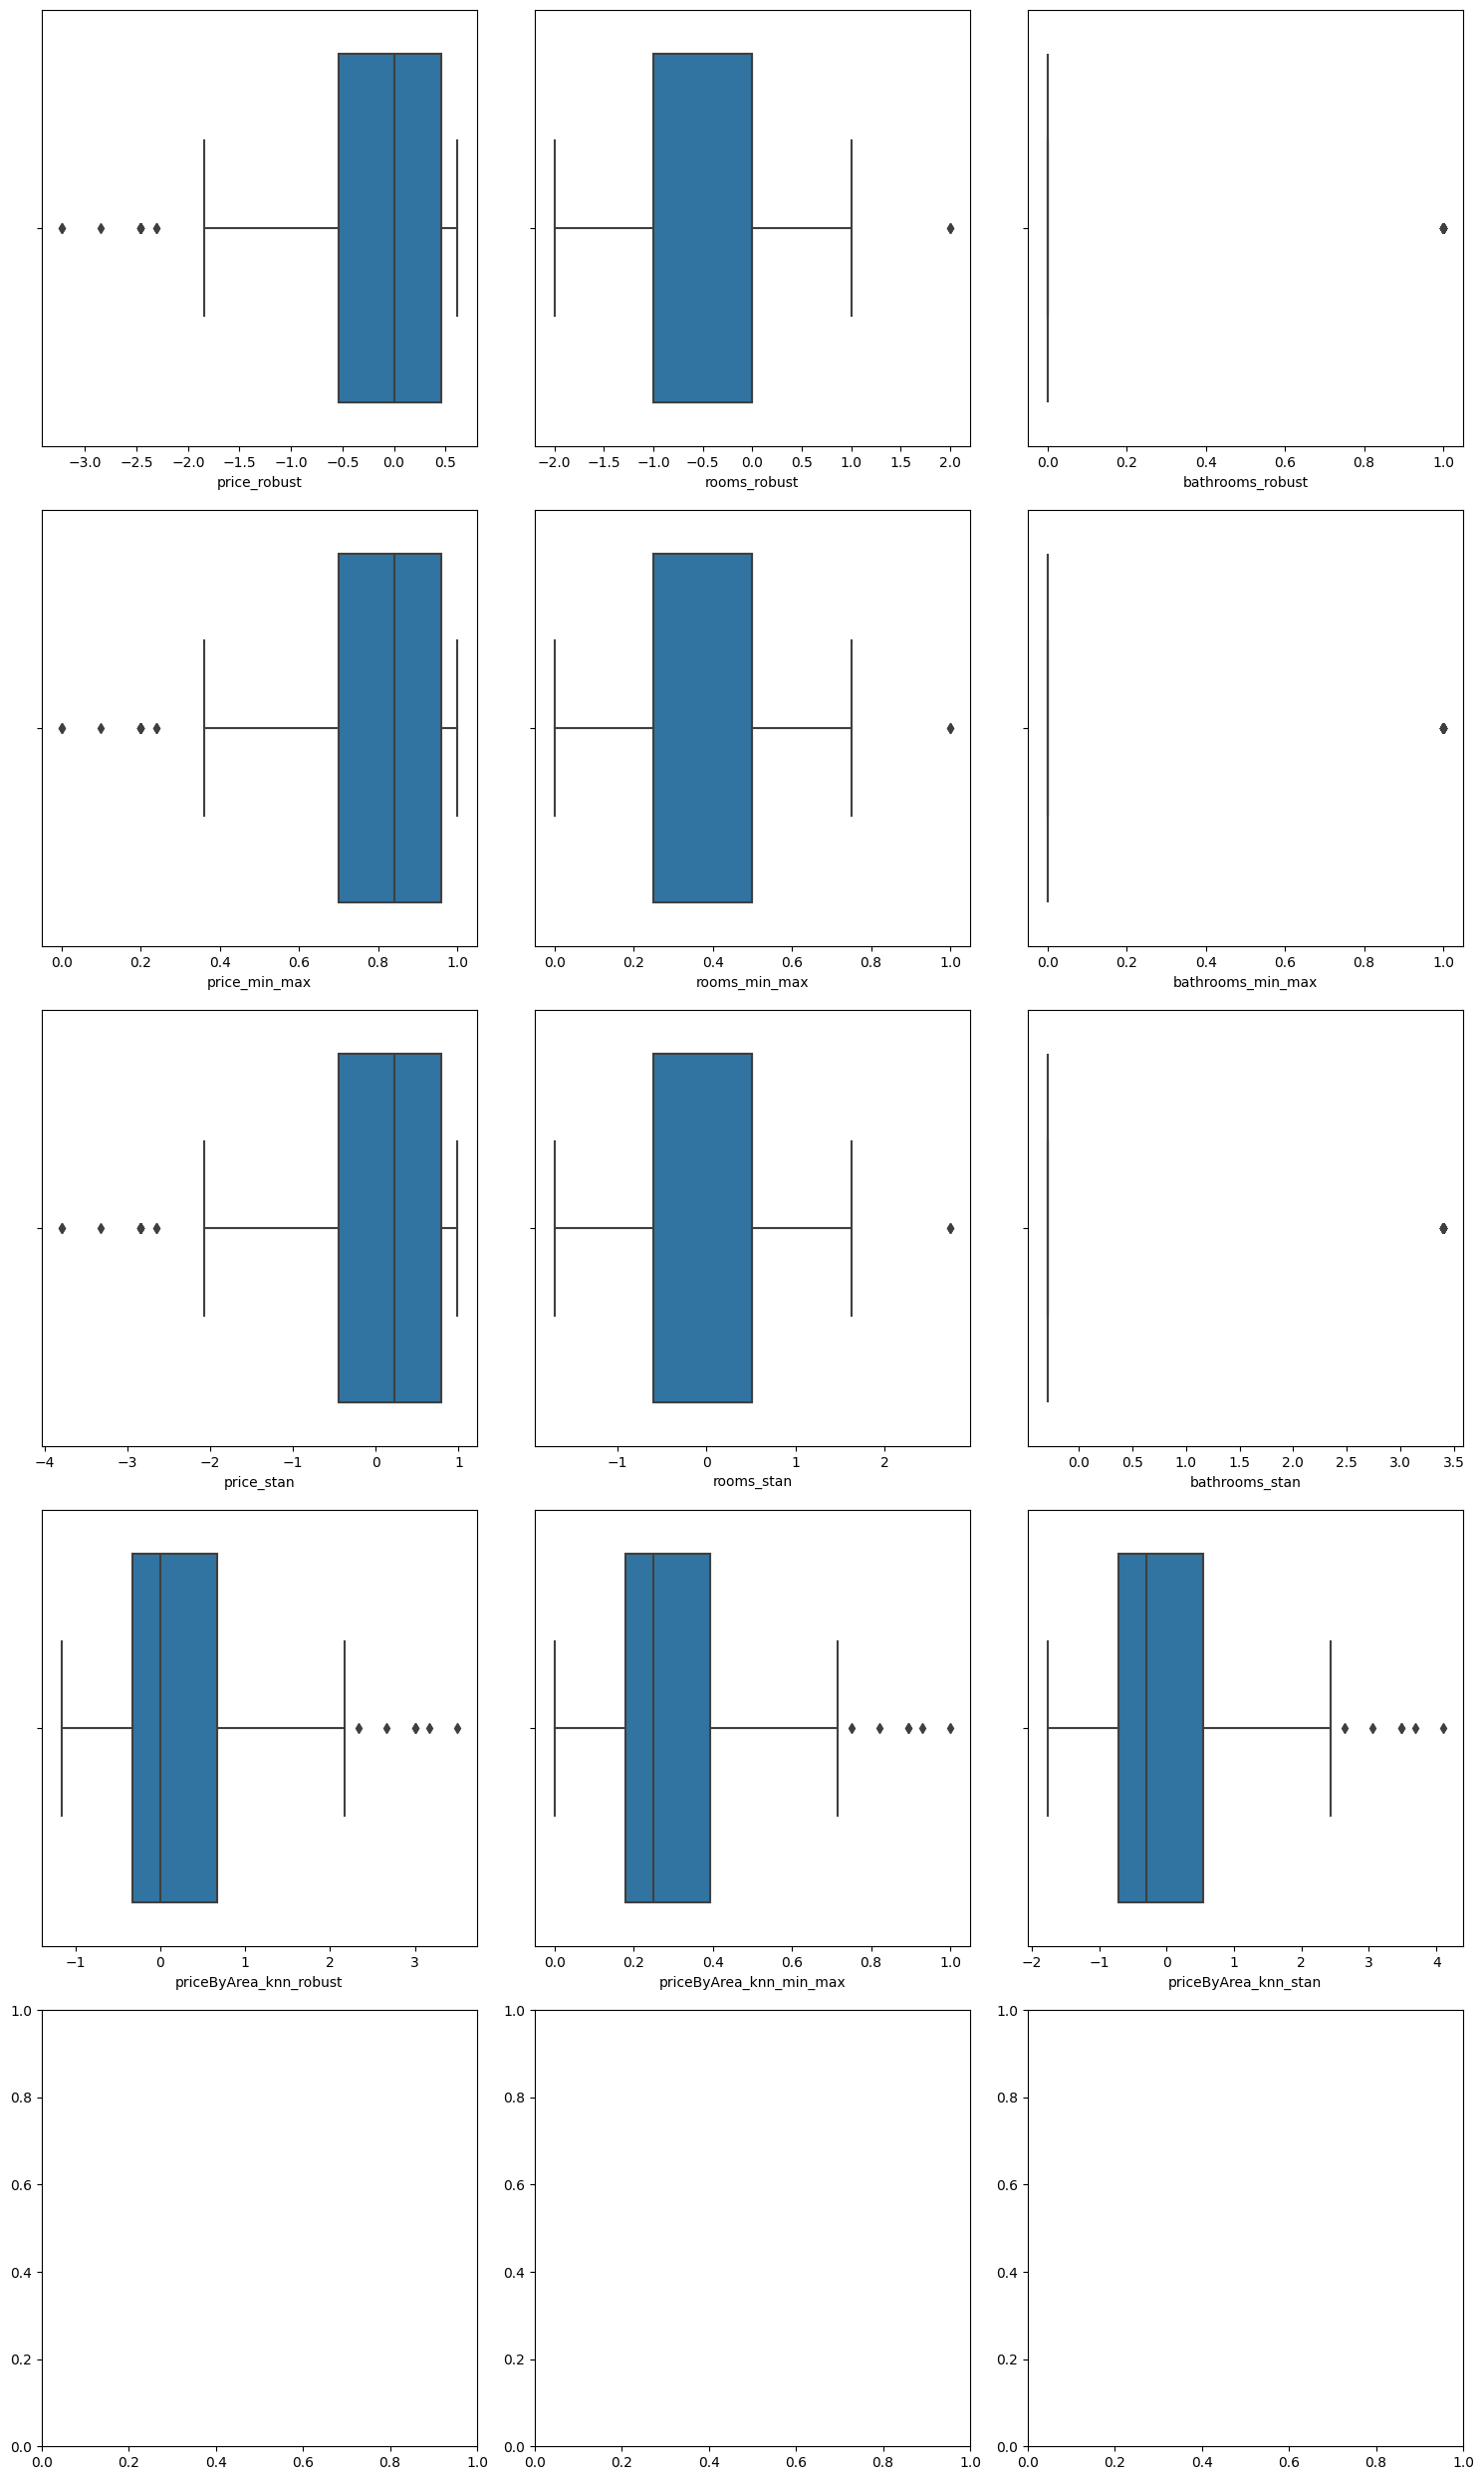

In [50]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))

sns.boxplot(x="price_robust", data=df_filtrado_madrid, ax=axes[0][0])
sns.boxplot(x="rooms_robust", data=df_filtrado_madrid, ax=axes[0][1])
sns.boxplot(x="bathrooms_robust", data=df_filtrado_madrid, ax=axes[0][2])

sns.boxplot(x="price_min_max", data=df_filtrado_madrid, ax=axes[1][0])
sns.boxplot(x="rooms_min_max", data=df_filtrado_madrid, ax=axes[1][1])
sns.boxplot(x="bathrooms_min_max", data=df_filtrado_madrid, ax=axes[1][2])

sns.boxplot(x="price_stan", data=df_filtrado_madrid, ax=axes[2][0])
sns.boxplot(x="rooms_stan", data=df_filtrado_madrid, ax=axes[2][1])
sns.boxplot(x="bathrooms_stan", data=df_filtrado_madrid, ax=axes[2][2])

sns.boxplot(x="priceByArea_knn_robust", data=df_filtrado_madrid, ax=axes[3][0])
sns.boxplot(x="priceByArea_knn_min_max", data=df_filtrado_madrid, ax=axes[3][1])
sns.boxplot(x="priceByArea_knn_stan", data=df_filtrado_madrid, ax=axes[3][2])

plt.tight_layout()
plt.show()

In [51]:
escalador_robust

RobustScaler()

In [52]:
df_filtrado_madrid.drop(columns=['price_min_max', 'rooms_min_max', 'bathrooms_min_max', 'priceByArea_knn_min_max', 
                 'price_stan', 'rooms_stan', 'bathrooms_stan', 'priceByArea_knn_stan'], inplace=True)

In [53]:
df_filtrado_madrid.to_csv("../datos/madrid_preprocesado.csv")